# DATA PREPARATION AND CLEANING

In [41]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

**Loads the Home Credit Default Risk dataset (307,511 rows, 122 columns) from the specified path, initiating the analysis process.**

In [14]:
df = pd.read_csv('E:\\DATA_ANALYSIS\\data\\home-credit-default-risk\\application_train.csv')

In [23]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

**Removing the columns which has more than 50% missing values.**


In [16]:
na_col = df.isna().sum().sort_values(ascending=False) / len(df)
cols_to_drop = na_col[na_col> 0.5].index
df.drop(columns=cols_to_drop, inplace=True)
df.shape

(307511, 81)

In [10]:
dropped_cols = list(cols_to_drop)
print("Dropped columns:", dropped_cols)

Dropped columns: ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE']


In [36]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [38]:
missing = df.isna().sum() / len(df)
missing[missing>0] * 100

EXT_SOURCE_2    0.214626
dtype: float64

In [37]:
df['NAME_TYPE_SUITE'].fillna('Unknown',inplace=True)

In [ ]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(), inplace=True)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(), inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)


In [ ]:
df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median(), inplace=True)

In [ ]:
bureau_cols = [col for col in df.columns if "AMT_REQ_CREDIT_BUREAU" in col]
for col in bureau_cols:
    df[col].fillna(0, inplace=True)

In [ ]:
median_cols = [
    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
    'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
    'TOTALAREA_MODE'
]

for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

df['EMERGENCYSTATE_MODE'].fillna("Unknown", inplace=True)


In [ ]:
social_cols = [col for col in df.columns if "SOCIAL_CIRCLE" in col]
for col in social_cols:
    df[col].fillna(df[col].median(), inplace=True)  


# Feature Selection 

## Coorelation Analysis (Numerical features)

In [42]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('SK_ID_CURR')
numeric_cols.remove('TARGET')

In [72]:
coorelations = df[numeric_cols].corrwith(df['TARGET']).sort_values(key=abs,ascending=False)
coorelations.head(25)

EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.155892
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                 -0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE               -0.039623
FLOORSMAX_AVG                 -0.039385
FLOORSMAX_MEDI                -0.039157
FLOORSMAX_MODE                -0.038377
REGION_POPULATION_RELATIVE    -0.037227
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
AMT_CREDIT                    -0.030369
TOTALAREA_MODE                -0.030214
FLAG_DOCUMENT_6               -0.028602
FLAG_WORK_PHONE                0.028524


In [74]:
coorelations_spearman = df[numeric_cols].corrwith(df['TARGET'],method='spearman').sort_values(key=abs,ascending=False)
coorelations_spearman.head(25)

EXT_SOURCE_2                  -0.147332
EXT_SOURCE_3                  -0.141495
DAYS_BIRTH                     0.078328
REGION_RATING_CLIENT_W_CITY    0.060936
REGION_RATING_CLIENT           0.058909
DAYS_LAST_PHONE_CHANGE         0.053711
DAYS_ID_PUBLISH                0.052535
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.040171
FLOORSMAX_AVG                 -0.037177
FLOORSMAX_MEDI                -0.036839
FLOORSMAX_MODE                -0.035704
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032363
AMT_GOODS_PRICE               -0.031488
DEF_60_CNT_SOCIAL_CIRCLE       0.031043
REGION_POPULATION_RELATIVE    -0.030562
FLAG_DOCUMENT_6               -0.028602
FLAG_WORK_PHONE                0.028524
DAYS_EMPLOYED                  0.025182
FLAG_PHONE                    -0.023806
TOTALAREA_MODE                -0.023609


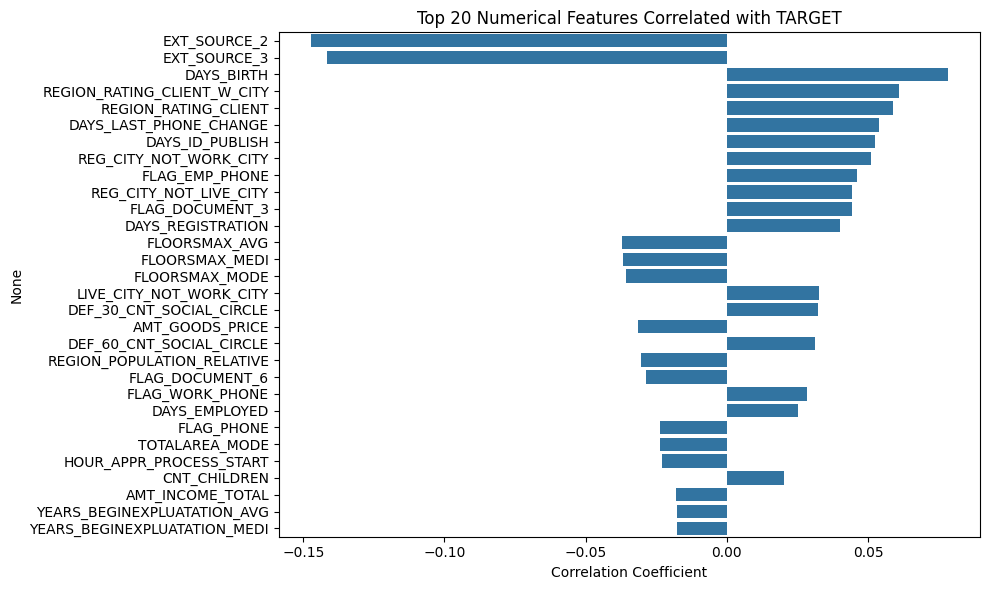

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coorelations_spearman.head(30).values, y=coorelations_spearman.head(30).index)
plt.title("Top 20 Numerical Features Correlated with TARGET")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

## Chi-Square Test (for categorical Features)

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Label encode categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = df[cat_cols].copy()

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Perform chi2 test
X_cat = df_encoded
y_cat = df['TARGET']
chi_scores, p_values = chi2(X_cat, y_cat)

# Combine results
chi_results = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2': chi_scores,
    'P-Value': p_values
}).sort_values(by='Chi2', ascending=False)

print(chi_results.head(15))


                       Feature         Chi2        P-Value
11           ORGANIZATION_TYPE  4138.607485   0.000000e+00
5             NAME_INCOME_TYPE   934.903558  2.537261e-205
1                  CODE_GENDER   605.629339  9.985791e-134
6          NAME_EDUCATION_TYPE   486.754127  7.245723e-108
12         EMERGENCYSTATE_MODE   290.747172   3.417865e-65
9              OCCUPATION_TYPE   273.844220   1.648541e-61
0           NAME_CONTRACT_TYPE   265.588342   1.038579e-59
8            NAME_HOUSING_TYPE   256.450950   1.018930e-57
2                 FLAG_OWN_CAR    96.888806   7.333211e-23
4              NAME_TYPE_SUITE    12.090855   5.066973e-04
10  WEEKDAY_APPR_PROCESS_START     7.361672   6.662880e-03
7           NAME_FAMILY_STATUS     4.860928   2.747156e-02
3              FLAG_OWN_REALTY     3.560974   5.915303e-02


## Feature Importance via LightGBM

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

In [57]:
X = df.drop(columns=['SK_ID_CURR', 'TARGET'])
y = df['TARGET']

# Basic Label Encoding for categoricals
X_encoded = X.copy()
for col in X_encoded.select_dtypes('object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

In [58]:
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [63]:
model = LGBMClassifier(
    n_estimators=1000,
    objective='binary',
    learning_rate=0.05,
    metric='auc',
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=20),
        log_evaluation(0)  # Set to 0 for silent, or e.g. 10 for updates every 10 rounds
    ]
)


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4160
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[185]	valid_0's auc: 0.754634


LGBMClassifier(learning_rate=0.05, metric='auc', n_estimators=1000,
               objective='binary', random_state=42)

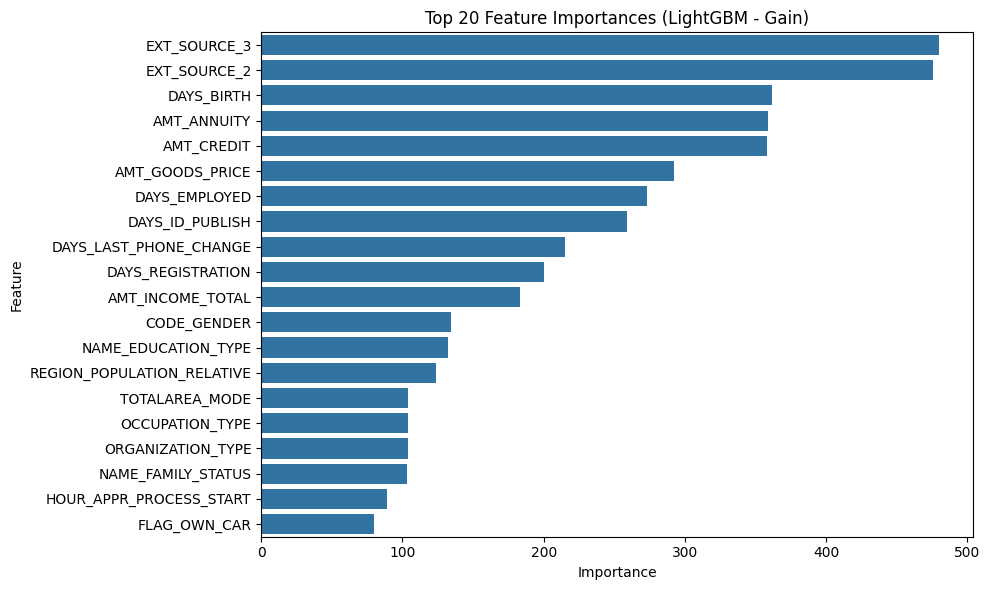

In [64]:
# Get feature importances
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(20))
plt.title("Top 20 Feature Importances (LightGBM - Gain)")
plt.tight_layout()
plt.show()


In [65]:
top_features = feature_imp[feature_imp['Importance'] > 0]['Feature'].tolist()
print("Top features selected:", top_features)


Top features selected: ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS', 'HOUR_APPR_PROCESS_START', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_3', 'WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'REG_CITY_NOT_LIVE_CITY', 'NAME_INCOME_TYPE', 'FLOORSMAX_AVG', 'FLAG_WORK_PHONE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NAME_HOUSING_TYPE', 'YEARS_BEGINEXPLUATATION_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_DOCUMENT_16', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_18',

In [80]:
feature_imp.head(40)

Feature  Importance
39                  EXT_SOURCE_3         480
38                  EXT_SOURCE_2         476
15                    DAYS_BIRTH         362
7                    AMT_ANNUITY         359
6                     AMT_CREDIT         358
8                AMT_GOODS_PRICE         292
16                 DAYS_EMPLOYED         273
18               DAYS_ID_PUBLISH         259
52        DAYS_LAST_PHONE_CHANGE         215
17             DAYS_REGISTRATION         200
5               AMT_INCOME_TOTAL         183
1                    CODE_GENDER         134
11           NAME_EDUCATION_TYPE         132
14    REGION_POPULATION_RELATIVE         124
46                TOTALAREA_MODE         104
25               OCCUPATION_TYPE         104
37             ORGANIZATION_TYPE         104
12            NAME_FAMILY_STATUS         103
30       HOUR_APPR_PROCESS_START          89
2                   FLAG_OWN_CAR          80
0             NAME_CONTRACT_TYPE          76
78    AMT_REQ_CREDIT_BUREAU_YEAR          67
42  YEARS_BEGINEXPLUATATION_MODE          60
40   YEARS_BEGINEXPLUATATION_AVG          58
77     AMT_REQ_CREDIT_BUREAU_QRT          57
54               FLAG_DOCUMENT_3          57
29    WEEKDAY_APPR_PROCESS_START          54
28   REGION_RATING_CLIENT_W_CITY          51
49      DEF_30_CNT_SOCIAL_CIRCLE          49
51      DEF_60_CNT_SOCIAL_CIRCLE          47
34        REG_CITY_NOT_LIVE_CITY          45
10              NAME_INCOME_TYPE          40
41                 FLOORSMAX_AVG          38
21               FLAG_WORK_PHONE          37
48      OBS_30_CNT_SOCIAL_CIRCLE          36
13             NAME_HOUSING_TYPE          36
44  YEARS_BEGINEXPLUATATION_MEDI          34
50      OBS_60_CNT_SOCIAL_CIRCLE          23
23                    FLAG_PHONE          23
4                   CNT_CHILDREN          21

In [81]:


sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (9, 5)

# ---- 1) Select final features for analysis ----
selected_features = [
    # External risk scores
    'EXT_SOURCE_2', 'EXT_SOURCE_3',
    # Demographics
    'DAYS_BIRTH', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
    # Financials
    'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
    # Employment
    'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
    # Housing / Property
    'NAME_HOUSING_TYPE', 'TOTALAREA_MODE',
    # Behavioral / Registration
    'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
    # Regional / Environment
    'REGION_POPULATION_RELATIVE'
]

cols_for_analysis = ['SK_ID_CURR', 'TARGET'] + selected_features
missing_cols = [c for c in cols_for_analysis if c not in df.columns]
if missing_cols:
    print("Warning: these columns are missing and will be skipped:", missing_cols)

cols_for_analysis = [c for c in cols_for_analysis if c in df.columns]
eda = df[cols_for_analysis].copy()


In [82]:
eda.head()

SK_ID_CURR  TARGET  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH CODE_GENDER  \
0      100002       1      0.262949      0.139376       -9461           M   
1      100003       0      0.622246      0.535276      -16765           F   
2      100004       0      0.555912      0.729567      -19046           M   
3      100006       0      0.650442      0.535276      -19005           F   
4      100007       0      0.322738      0.535276      -19932           M   

             NAME_EDUCATION_TYPE NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
0  Secondary / secondary special          Working  Single / not married   
1               Higher education    State servant               Married   
2  Secondary / secondary special          Working  Single / not married   
3  Secondary / secondary special          Working        Civil marriage   
4  Secondary / secondary special          Working  Single / not married   

   AMT_CREDIT  ...  AMT_INCOME_TOTAL  DAYS_EMPLOYED  OCCUPATION_TYPE  \
0    406597.5  ...          202500.0           -637         Laborers   
1   1293502.5  ...          270000.0          -1188       Core staff   
2    135000.0  ...           67500.0           -225         Laborers   
3    312682.5  ...          135000.0          -3039         Laborers   
4    513000.0  ...          121500.0          -3038       Core staff   

        ORGANIZATION_TYPE  NAME_HOUSING_TYPE TOTALAREA_MODE DAYS_ID_PUBLISH  \
0  Business Entity Type 3  House / apartment         0.0149           -2120   
1                  School  House / apartment         0.0714            -291   
2              Government  House / apartment         0.0688           -2531   
3  Business Entity Type 3  House / apartment         0.0688           -2437   
4                Religion  House / apartment         0.0688           -3458   

   DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  REGION_POPULATION_RELATIVE  
0                 -1134.0            -3648.0                    0.018801  
1                  -828.0            -1186.0                    0.003541  
2                  -815.0            -4260.0                    0.010032  
3                  -617.0            -9833.0                    0.008019  
4                 -1106.0            -4311.0                    0.028663  

[5 rows x 22 columns]

In [83]:
# Convert negative day offsets to human-readable years
if 'DAYS_BIRTH' in eda.columns:
    eda['AGE_YEARS'] = (-eda['DAYS_BIRTH'] / 365.25).round(1)

if 'DAYS_EMPLOYED' in eda.columns:
    # If you previously handled the 365243 anomaly, this will be clean already.
    eda['YEARS_EMPLOYED'] = (eda['DAYS_EMPLOYED'].clip(lower=0) / 365.25).round(1)




In [84]:
# Useful financial ratios for analysis (not part of the 20, just for insights)
if set(['AMT_CREDIT','AMT_INCOME_TOTAL']).issubset(eda.columns):
    eda['CREDIT_INCOME_RATIO'] = eda['AMT_CREDIT'] / eda['AMT_INCOME_TOTAL']
if set(['AMT_ANNUITY','AMT_INCOME_TOTAL']).issubset(eda.columns):
    eda['ANNUITY_INCOME_RATIO'] = eda['AMT_ANNUITY'] / eda['AMT_INCOME_TOTAL']
if set(['AMT_CREDIT','AMT_GOODS_PRICE']).issubset(eda.columns):
    eda['CREDIT_GOODS_RATIO'] = eda['AMT_CREDIT'] / eda['AMT_GOODS_PRICE']

In [85]:
print("Shape:", eda.shape)
print("\nTARGET balance:")
print(eda['TARGET'].value_counts(dropna=False))
print("\nTARGET balance (rate):")
print(eda['TARGET'].value_counts(normalize=True).round(4))

print("\nMissingness (%):")
print((eda.isna().mean() * 100).round(2).sort_values(ascending=False))

# Basic info for data types
print("\nDtypes:")
print(eda.dtypes)


Shape: (307511, 27)

TARGET balance:
TARGET
0    282686
1     24825
Name: count, dtype: int64

TARGET balance (rate):
TARGET
0    0.9193
1    0.0807
Name: proportion, dtype: float64

Missingness (%):
EXT_SOURCE_2                  0.21
SK_ID_CURR                    0.00
OCCUPATION_TYPE               0.00
ANNUITY_INCOME_RATIO          0.00
CREDIT_INCOME_RATIO           0.00
YEARS_EMPLOYED                0.00
AGE_YEARS                     0.00
REGION_POPULATION_RELATIVE    0.00
DAYS_REGISTRATION             0.00
DAYS_LAST_PHONE_CHANGE        0.00
DAYS_ID_PUBLISH               0.00
TOTALAREA_MODE                0.00
NAME_HOUSING_TYPE             0.00
ORGANIZATION_TYPE             0.00
DAYS_EMPLOYED                 0.00
TARGET                        0.00
AMT_INCOME_TOTAL              0.00
AMT_GOODS_PRICE               0.00
AMT_ANNUITY                   0.00
AMT_CREDIT                    0.00
NAME_FAMILY_STATUS            0.00
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           

**Narrow focus to demographic, financial, and employment-related features, making the dataset more manageable and relevant for default risk analysis.**


# UNIVARIATE ANALYSIS

## Continuous Univariate Analysis

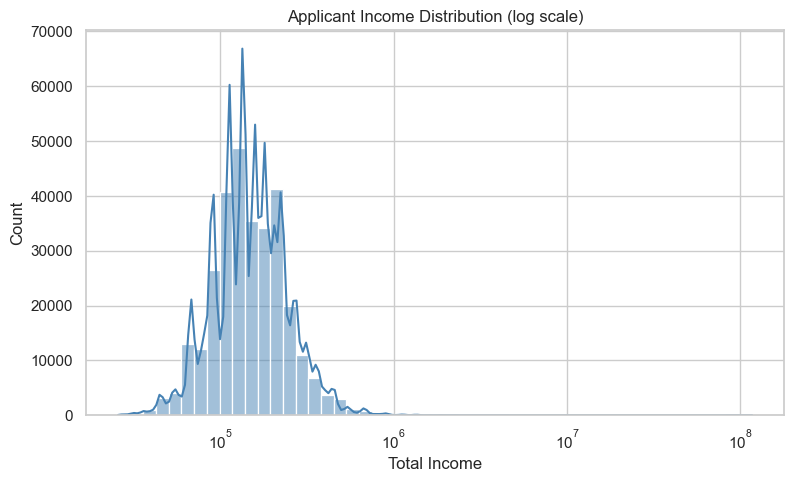

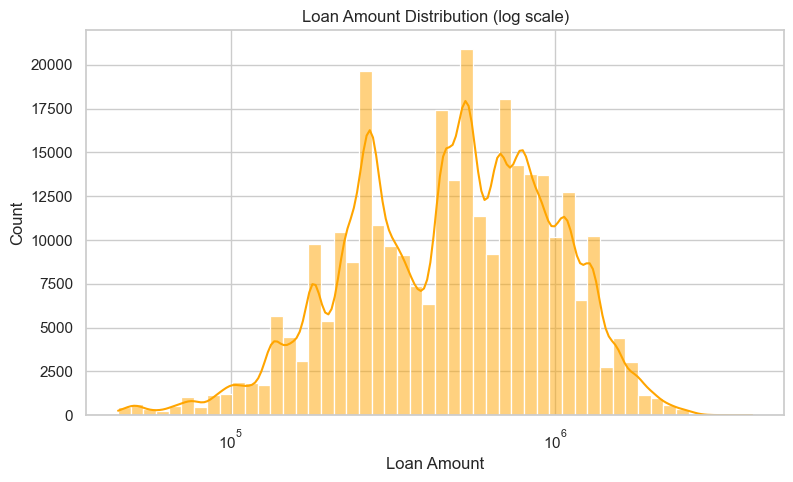

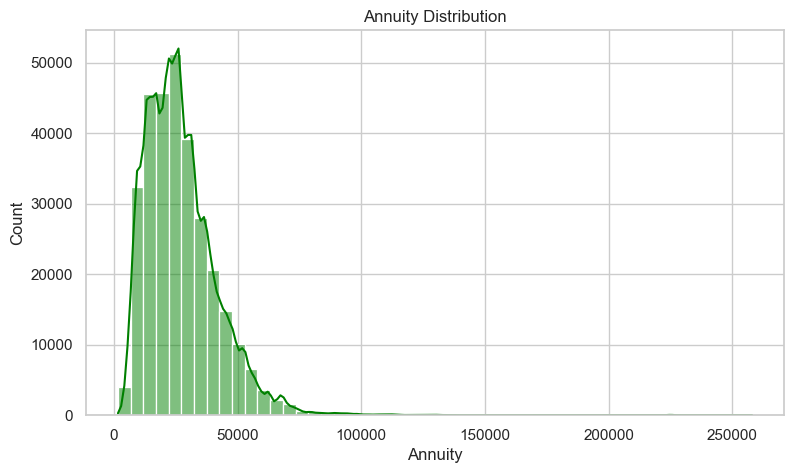

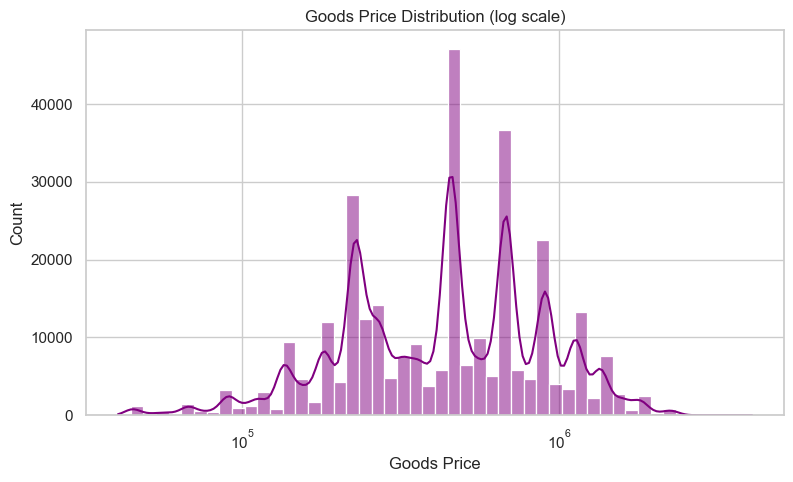

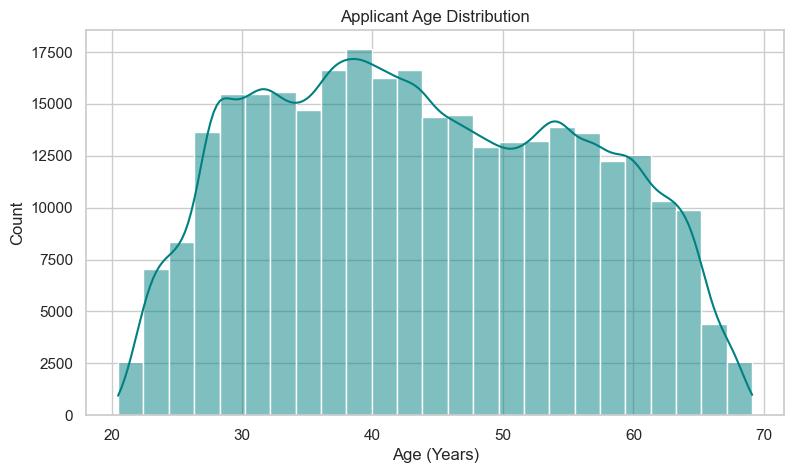

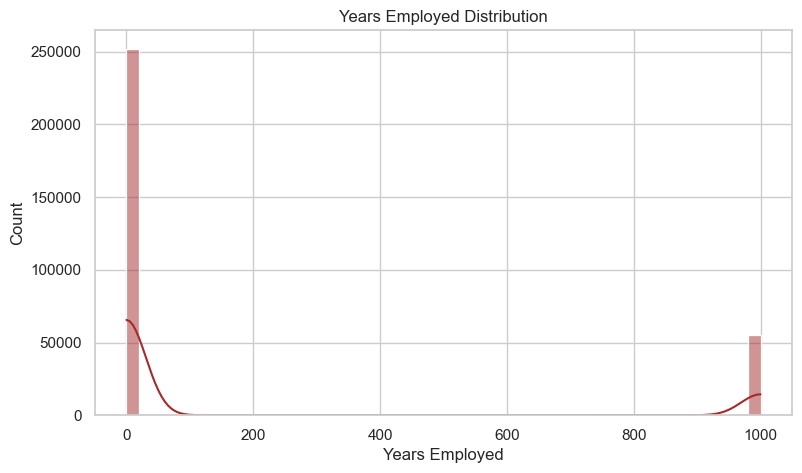

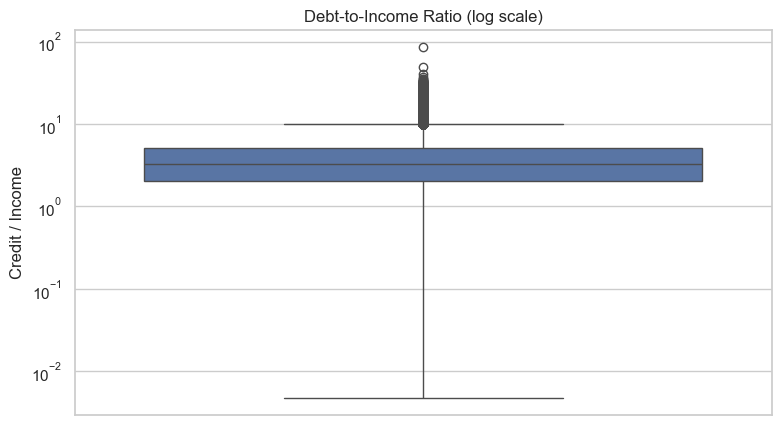

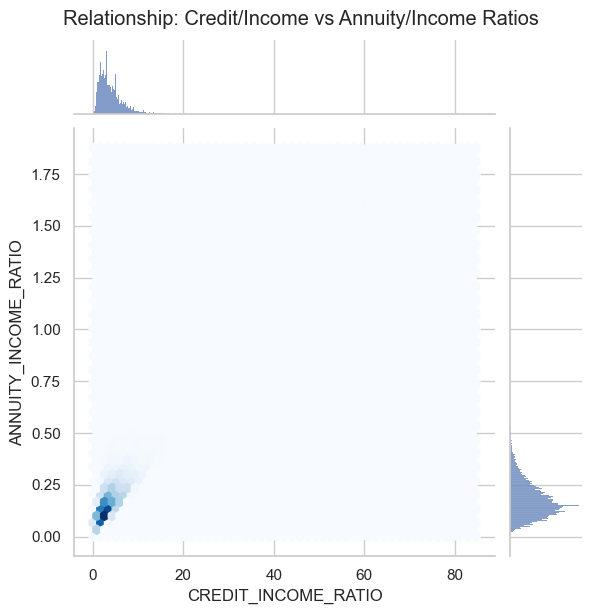

In [86]:
# --- Income ---
sns.histplot(eda['AMT_INCOME_TOTAL'], bins=50, log_scale=True, kde=True, color='steelblue')
plt.title('Applicant Income Distribution (log scale)')
plt.xlabel('Total Income')
plt.show()

# --- Credit (Loan Amount) ---
sns.histplot(eda['AMT_CREDIT'], bins=50, log_scale=True, kde=True, color='orange')
plt.title('Loan Amount Distribution (log scale)')
plt.xlabel('Loan Amount')
plt.show()

# --- Annuity ---
sns.histplot(eda['AMT_ANNUITY'], bins=50, kde=True, color='green')
plt.title('Annuity Distribution')
plt.xlabel('Annuity')
plt.show()

# --- Goods Price ---
sns.histplot(eda['AMT_GOODS_PRICE'], bins=50, log_scale=True, kde=True, color='purple')
plt.title('Goods Price Distribution (log scale)')
plt.xlabel('Goods Price')
plt.show()

# --- Age in Years ---
sns.histplot(eda['AGE_YEARS'], bins=25, kde=True, color='teal')
plt.title('Applicant Age Distribution')
plt.xlabel('Age (Years)')
plt.show()

# --- Employment Duration ---
if 'YEARS_EMPLOYED' in eda.columns:
    sns.histplot(eda['YEARS_EMPLOYED'], bins=50, kde=True, color='brown')
    plt.title('Years Employed Distribution')
    plt.xlabel('Years Employed')
    plt.show()

# --- Debt-to-Income Ratio ---
if 'CREDIT_INCOME_RATIO' in eda.columns:
    sns.boxplot(y=eda['CREDIT_INCOME_RATIO'])
    plt.yscale('log')
    plt.title('Debt-to-Income Ratio (log scale)')
    plt.ylabel('Credit / Income')
    plt.show()

# --- Joint Plot: Credit/Income vs Annuity/Income ---
if set(['CREDIT_INCOME_RATIO','ANNUITY_INCOME_RATIO']).issubset(eda.columns):
    sns.jointplot(x='CREDIT_INCOME_RATIO', y='ANNUITY_INCOME_RATIO',
                  data=eda, kind='hex', cmap='Blues')
    plt.suptitle("Relationship: Credit/Income vs Annuity/Income Ratios", y=1.02)
    plt.show()


In [78]:
df['TARGET'].value_counts() / len(df) *100

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

## Categorical Univariate analysis

In [ ]:
eda['nam']

AttributeError: 'Index' object has no attribute 'count'

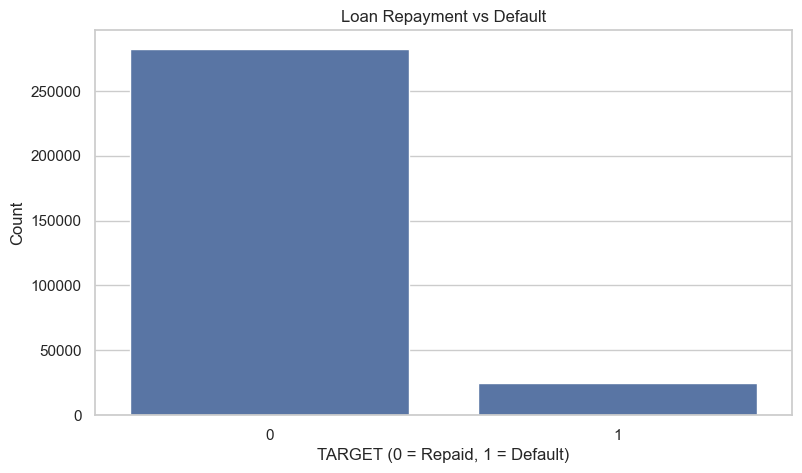

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\529897323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CODE_GENDER', data=eda, palette='pastel')


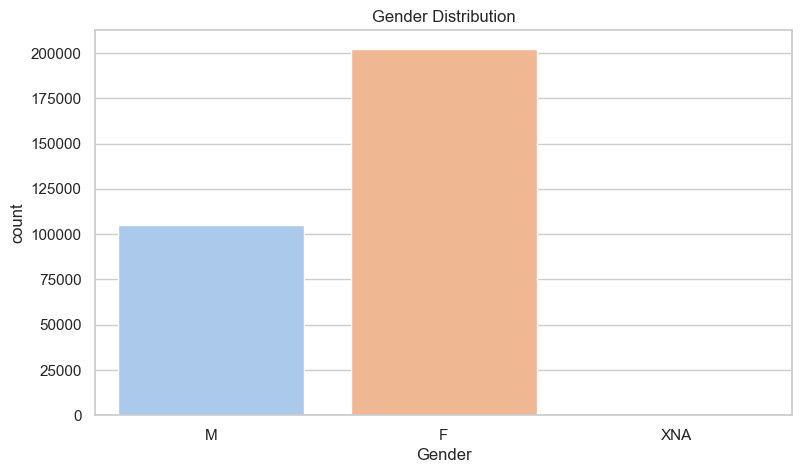

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\529897323.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_EDUCATION_TYPE', data=eda,


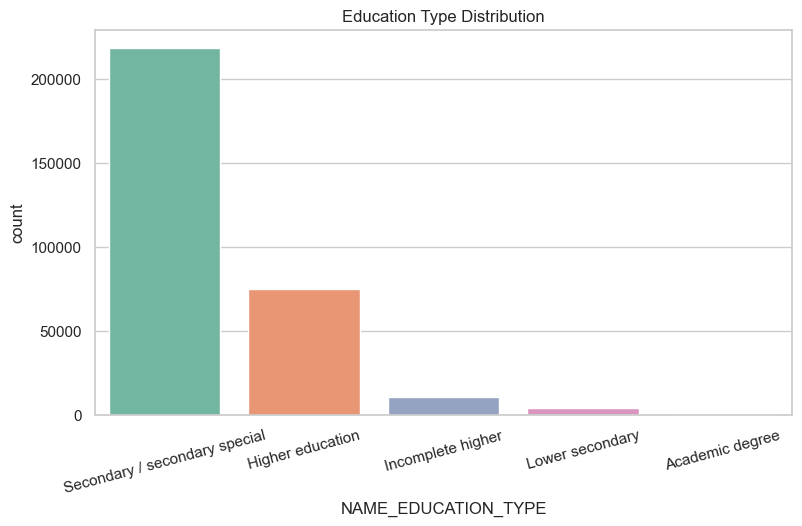

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\529897323.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_FAMILY_STATUS', data=eda,


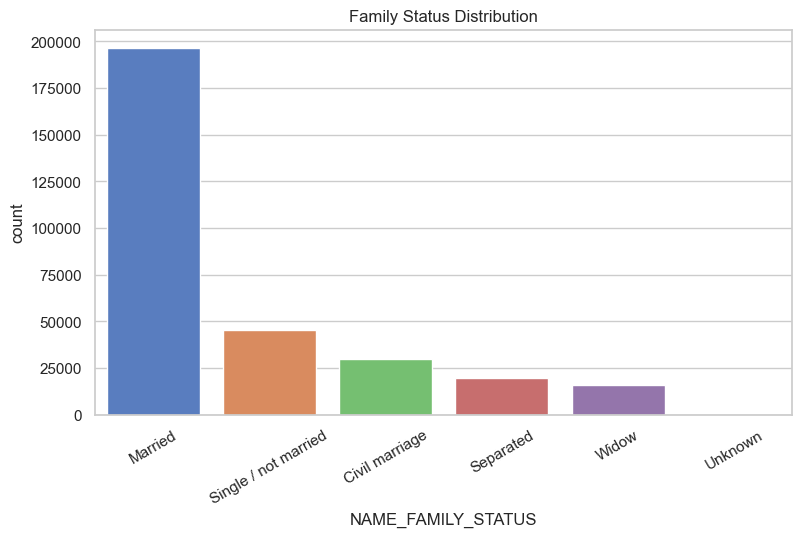

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\529897323.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_INCOME_TYPE', data=eda,


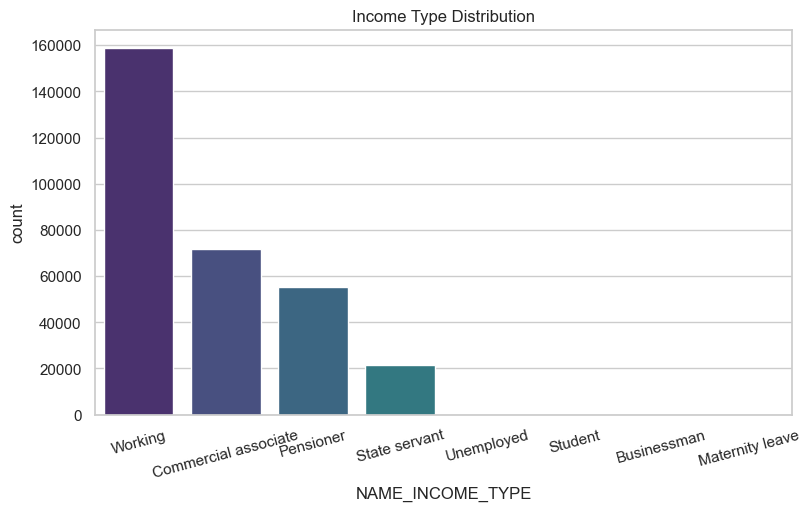

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\529897323.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_HOUSING_TYPE', data=eda,


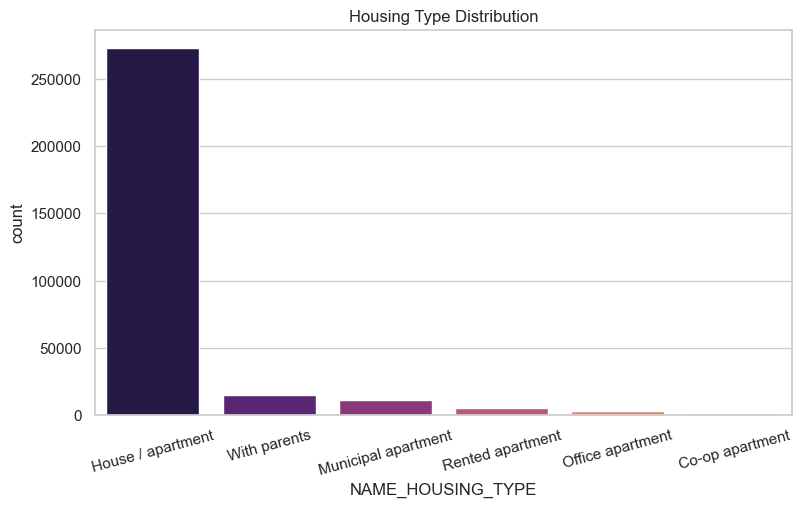

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\529897323.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_occ.index, x=top_occ.values, palette='cool')


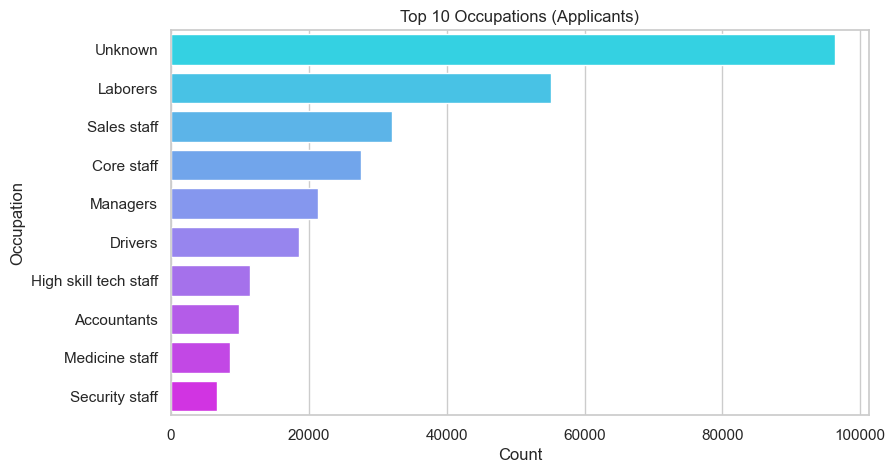

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\529897323.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_org.index, x=top_org.values, palette='cividis')


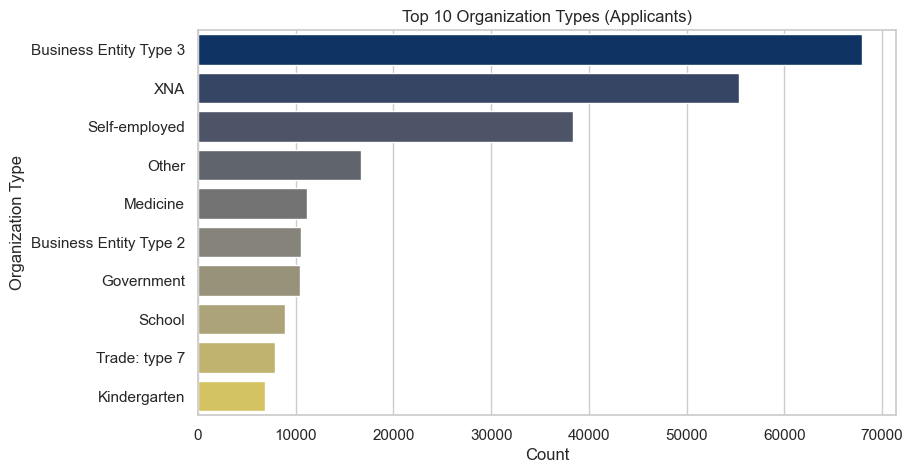

In [90]:
# --- TARGET (Default vs Repaid) ---
sns.countplot(x='TARGET', data=eda)
plt.title("Loan Repayment vs Default")
plt.xlabel("TARGET (0 = Repaid, 1 = Default)")
plt.ylabel("Count")
plt.show()

# --- Gender ---
if 'CODE_GENDER' in eda.columns:
    sns.countplot(x='CODE_GENDER', data=eda, palette='pastel')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.show()

# --- Education Type ---
if 'NAME_EDUCATION_TYPE' in eda.columns:
    sns.countplot(x='NAME_EDUCATION_TYPE', data=eda,
                  order=eda['NAME_EDUCATION_TYPE'].value_counts().index, palette='Set2')
    plt.title('Education Type Distribution')
    plt.xticks(rotation=15)
    plt.show()

# --- Family Status ---
if 'NAME_FAMILY_STATUS' in eda.columns:
    sns.countplot(x='NAME_FAMILY_STATUS', data=eda,
                  order=eda['NAME_FAMILY_STATUS'].value_counts().index, palette='muted')
    plt.title('Family Status Distribution')
    plt.xticks(rotation=30)
    plt.show()

# --- Income Type ---
if 'NAME_INCOME_TYPE' in eda.columns:
    sns.countplot(x='NAME_INCOME_TYPE', data=eda,
                  order=eda['NAME_INCOME_TYPE'].value_counts().index, palette='viridis')
    plt.title('Income Type Distribution')
    plt.xticks(rotation=15)
    plt.show()

# --- Housing Type ---
if 'NAME_HOUSING_TYPE' in eda.columns:
    sns.countplot(x='NAME_HOUSING_TYPE', data=eda,
                  order=eda['NAME_HOUSING_TYPE'].value_counts().index, palette='magma')
    plt.title('Housing Type Distribution')
    plt.xticks(rotation=15)
    plt.show()

# --- Occupation Type (Top 10) ---
if 'OCCUPATION_TYPE' in eda.columns:
    top_occ = eda['OCCUPATION_TYPE'].value_counts().head(10)
    sns.barplot(y=top_occ.index, x=top_occ.values, palette='cool')
    plt.title("Top 10 Occupations (Applicants)")
    plt.xlabel("Count")
    plt.ylabel("Occupation")
    plt.show()

# --- Organization Type (Top 10) ---
if 'ORGANIZATION_TYPE' in eda.columns:
    top_org = eda['ORGANIZATION_TYPE'].value_counts().head(10)
    sns.barplot(y=top_org.index, x=top_org.values, palette='cividis')
    plt.title("Top 10 Organization Types (Applicants)")
    plt.xlabel("Count")
    plt.ylabel("Organization Type")
    plt.show()


-----

# BIVARIATE ANALYSIS

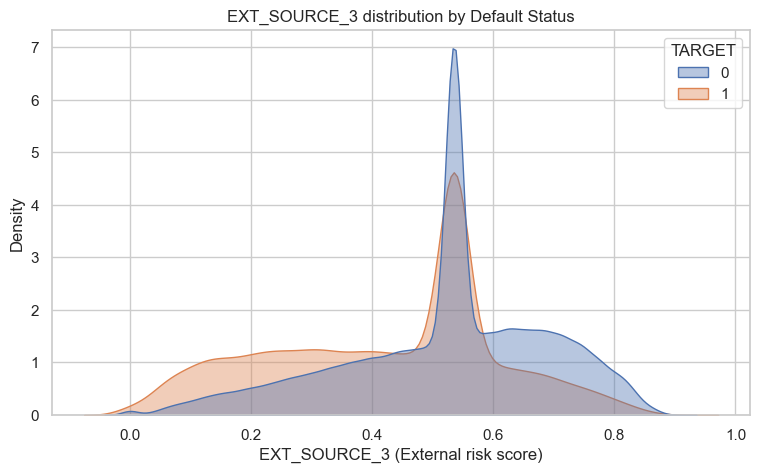

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


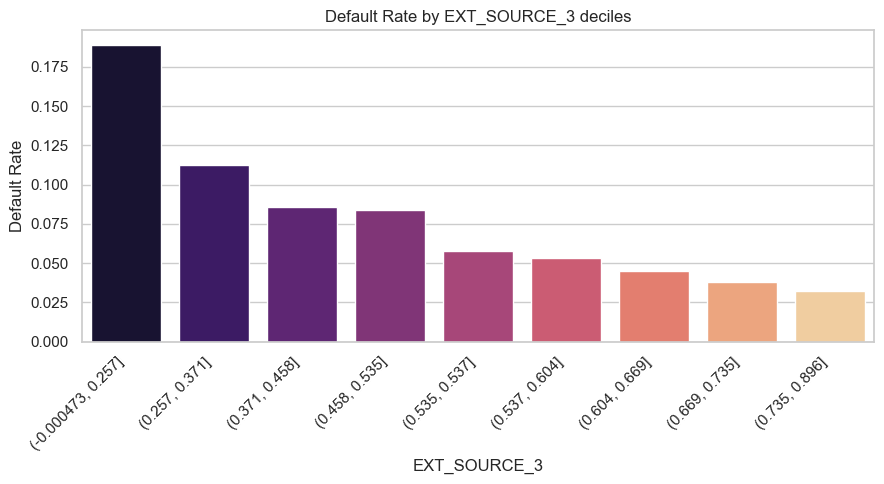

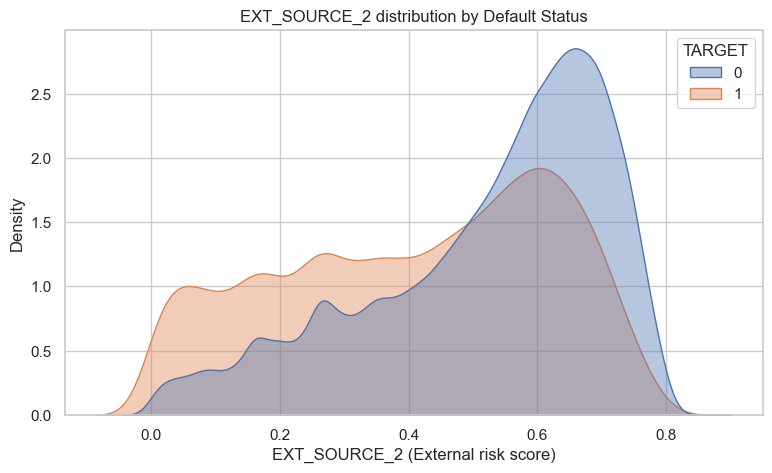

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


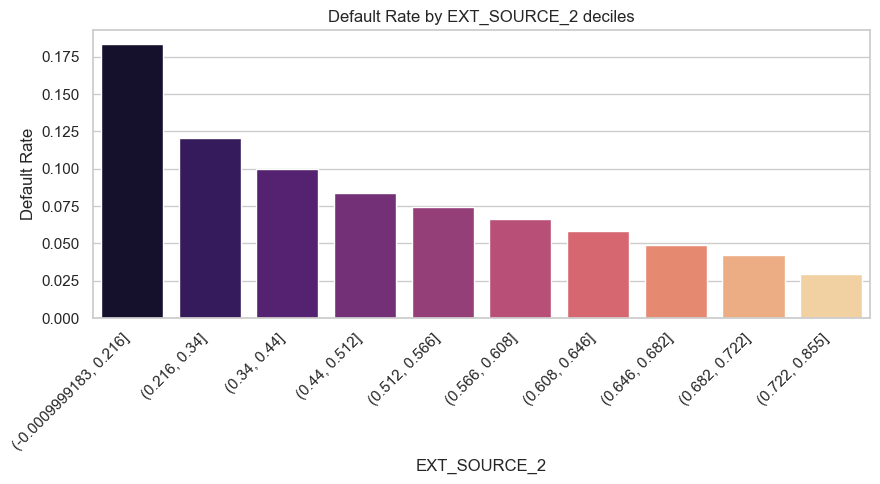

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AGE_YEARS', data=eda, palette='pastel')


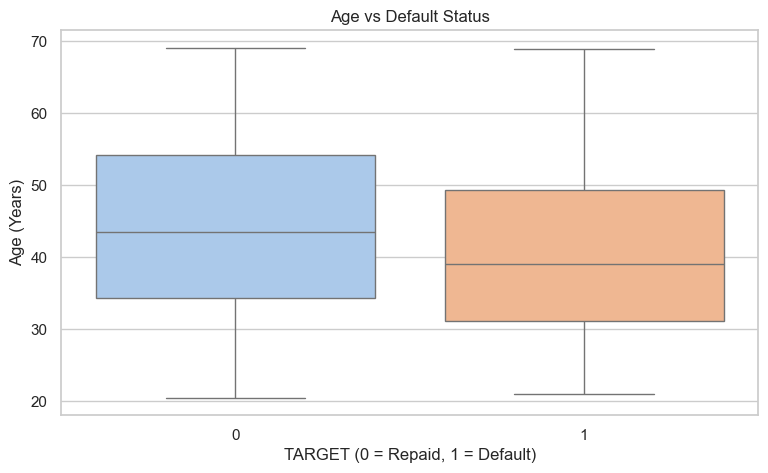

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


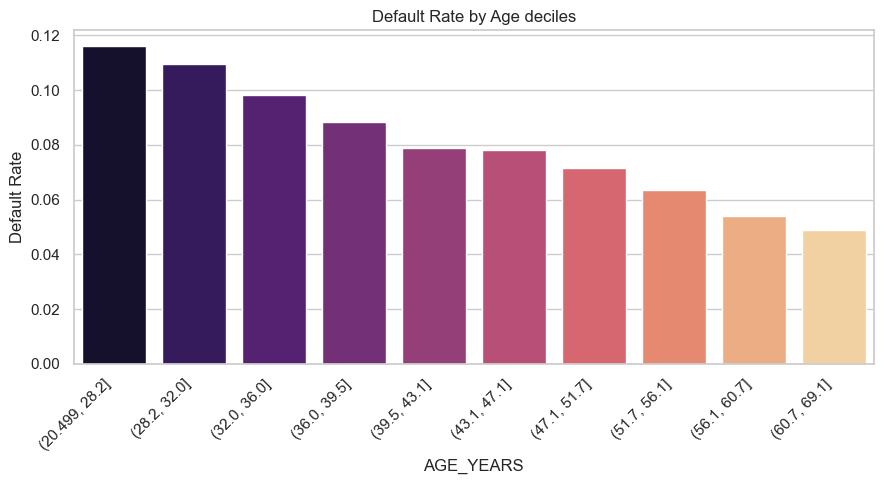

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='YEARS_EMPLOYED', data=eda, palette='Set2')


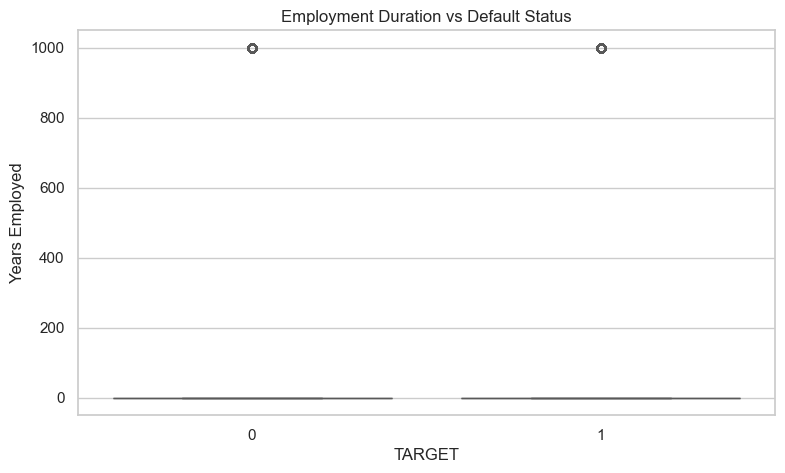

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


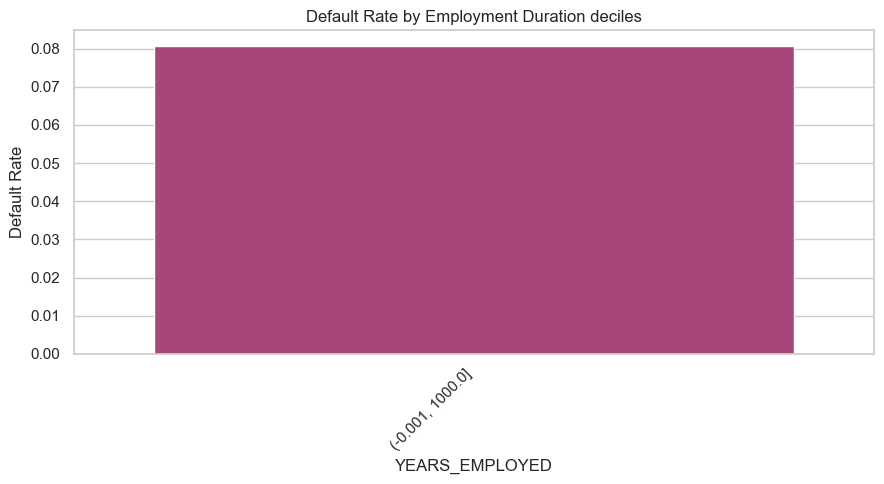

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='CREDIT_INCOME_RATIO', data=eda, palette='pastel')


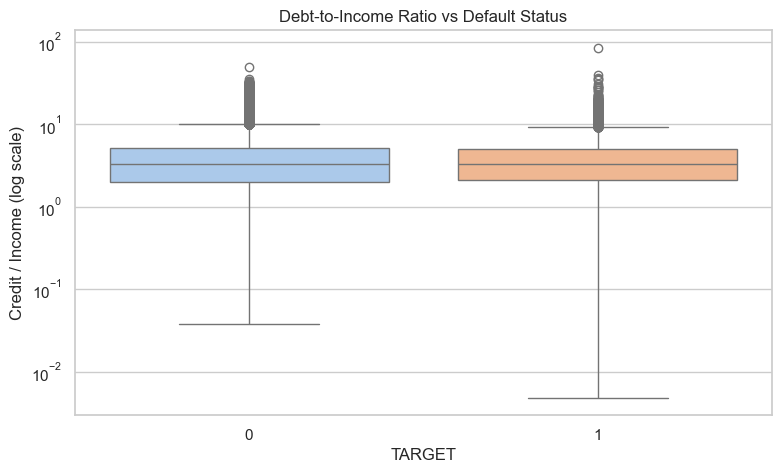

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


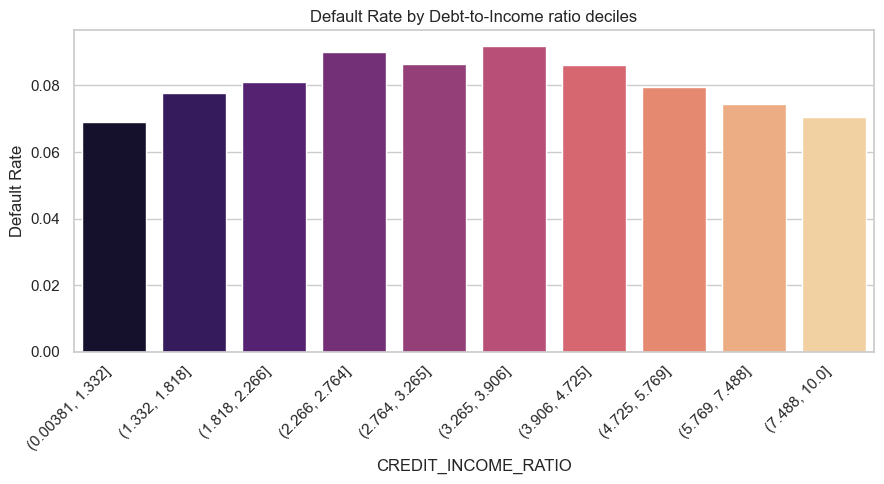

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='ANNUITY_INCOME_RATIO', data=eda, palette='muted')


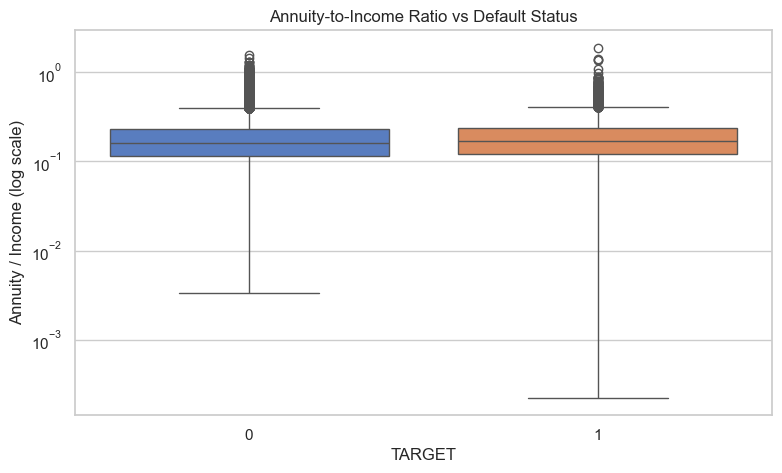

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


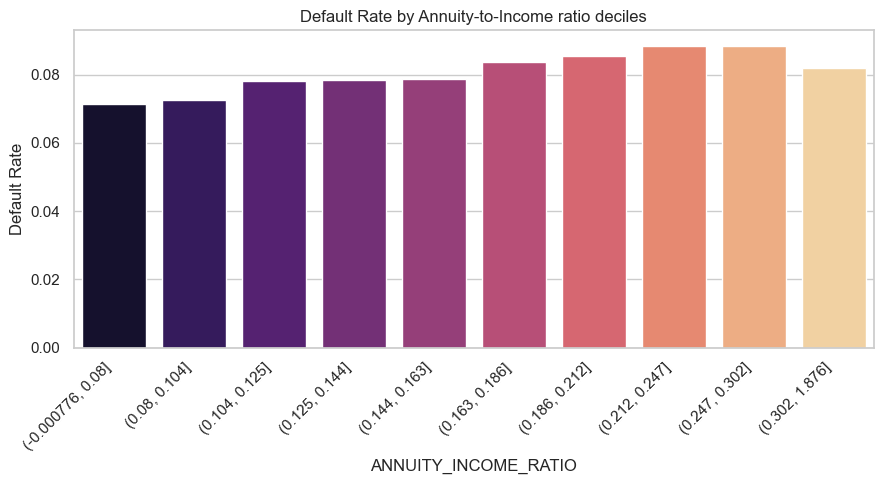

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='CREDIT_GOODS_RATIO', data=eda, palette='cool')


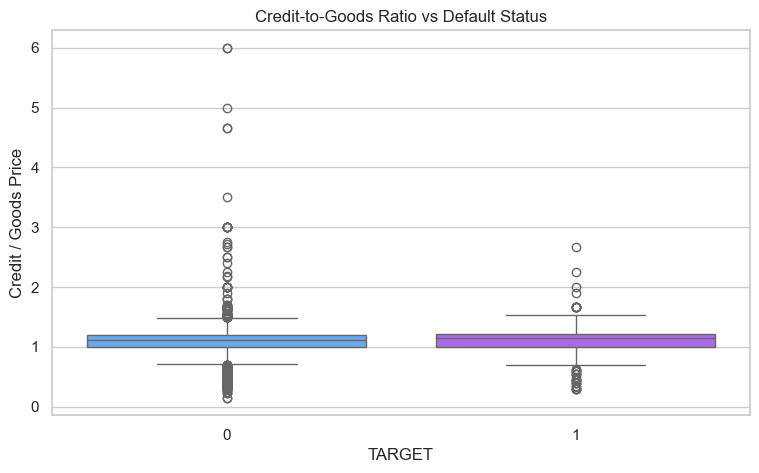

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


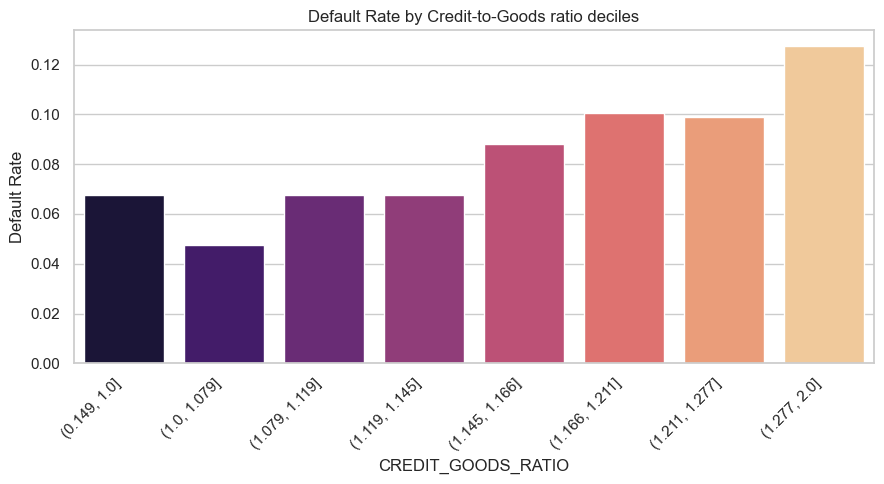

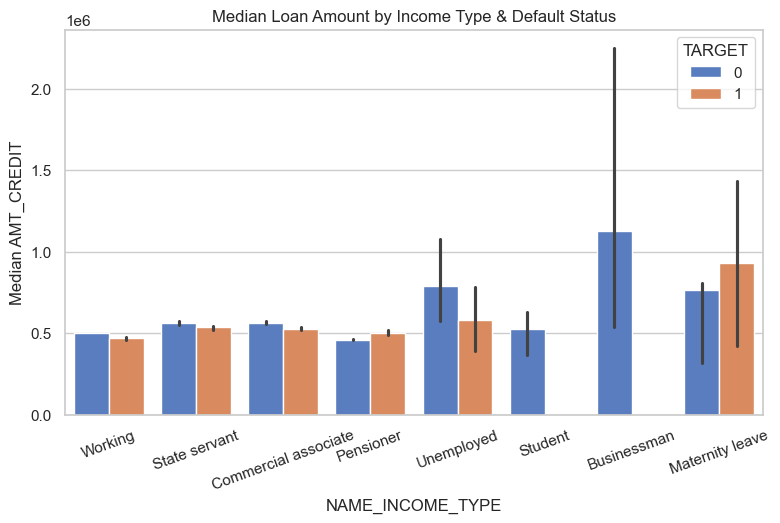

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fam.index, y=fam.values, palette='coolwarm')


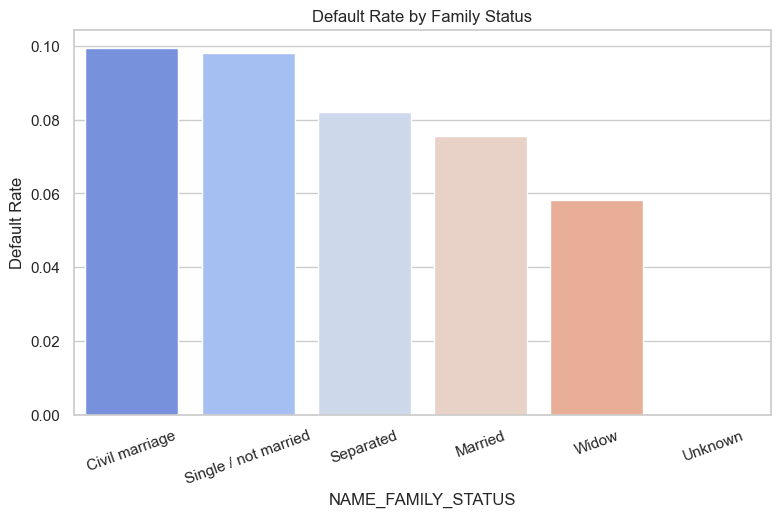

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=h.index, y=h.values, palette='magma')


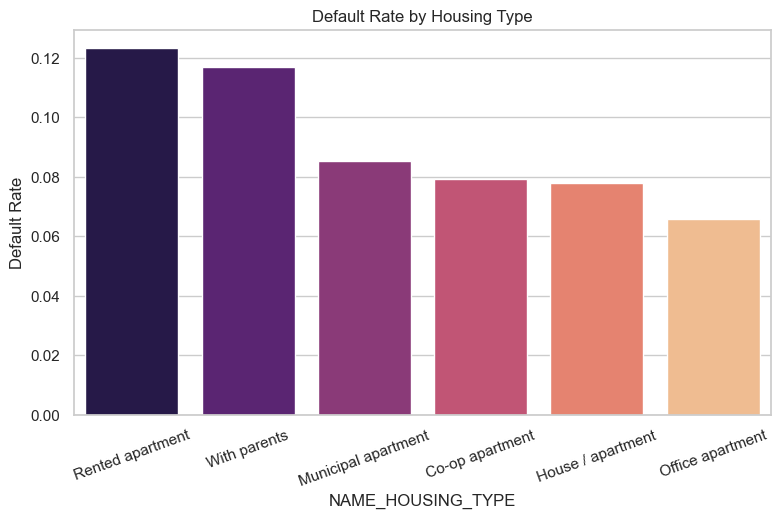

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=org.index, y=org.values, palette='cividis')


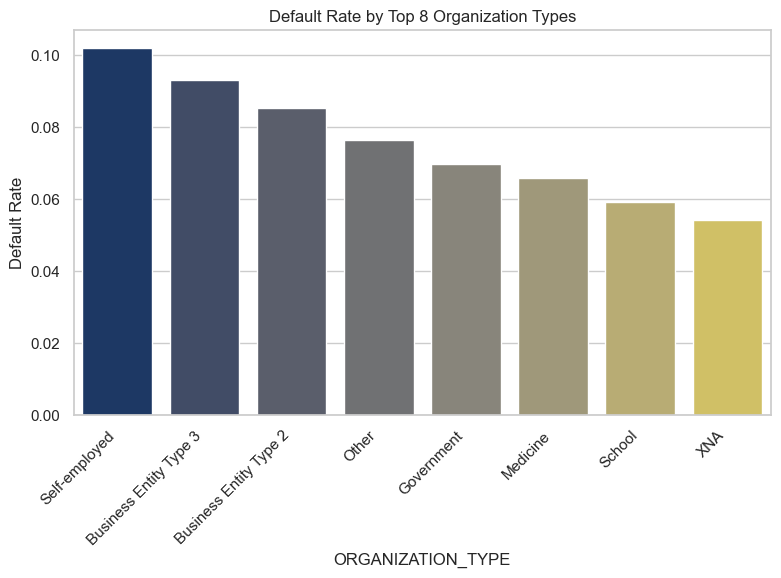

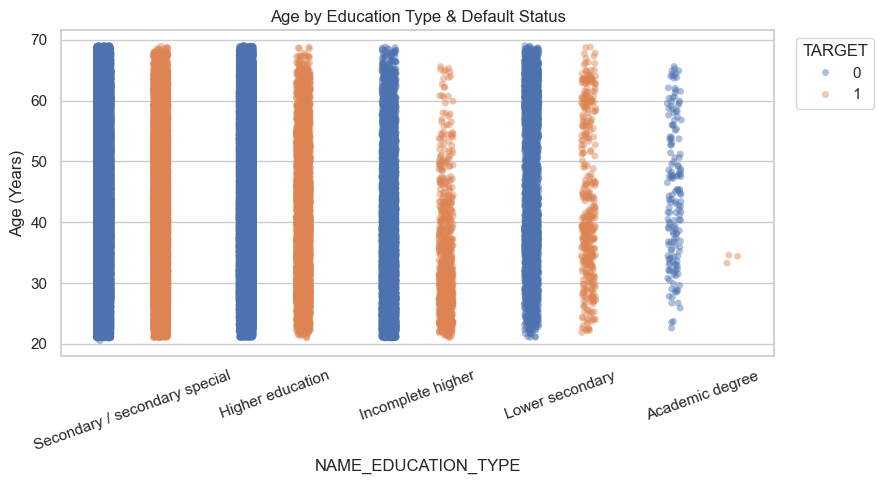

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='REGION_POPULATION_RELATIVE', data=eda, palette='muted')


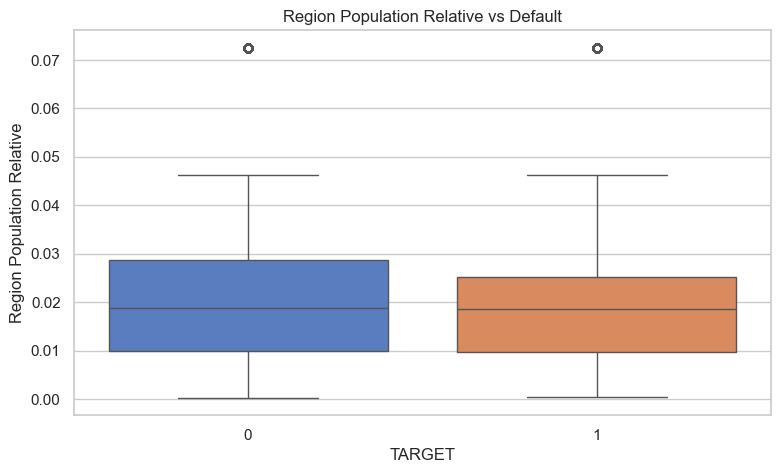

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\77004216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')


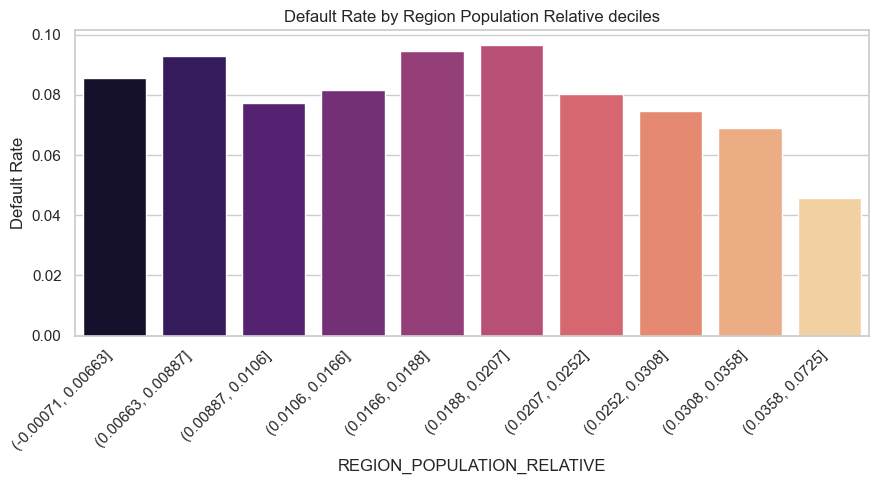

In [91]:

if set(['AMT_CREDIT','AMT_INCOME_TOTAL']).issubset(eda.columns):
    eda['CREDIT_INCOME_RATIO'] = eda['AMT_CREDIT'] / eda['AMT_INCOME_TOTAL']
if set(['AMT_ANNUITY','AMT_INCOME_TOTAL']).issubset(eda.columns):
    eda['ANNUITY_INCOME_RATIO'] = eda['AMT_ANNUITY'] / eda['AMT_INCOME_TOTAL']
if set(['AMT_CREDIT','AMT_GOODS_PRICE']).issubset(eda.columns):
    eda['CREDIT_GOODS_RATIO'] = eda['AMT_CREDIT'] / eda['AMT_GOODS_PRICE']

# Helper: default rate by quantile bins (works for any numeric column)
def plot_default_rate_by_bin(frame, col, q=10, title=None, clip_upper=None):
    tmp = frame[[col, 'TARGET']].dropna().copy()
    if clip_upper is not None:
        tmp[col] = np.minimum(tmp[col], clip_upper)
    # Guard: need at least 2 unique values to bin
    if tmp[col].nunique() < 2:
        print(f"[{col}] skipped (not enough unique values)")
        return
    tmp['bin'] = pd.qcut(tmp[col], q=min(q, tmp[col].nunique()), duplicates='drop')
    agg = tmp.groupby('bin', observed=False)['TARGET'].mean().reset_index()
    sns.barplot(x='bin', y='TARGET', data=agg, palette='magma')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Default Rate')
    plt.xlabel(col)
    plt.title(title or f'Default Rate by {col} quantile bins')
    plt.tight_layout()
    plt.show()

# ===============================
# BIVARIATE ANALYSIS (mixed plots)
# ===============================

# 1) EXT_SOURCE_3 by TARGET (distribution)
if 'EXT_SOURCE_3' in eda.columns:
    sns.kdeplot(data=eda, x='EXT_SOURCE_3', hue='TARGET', common_norm=False, fill=True, alpha=0.4)
    plt.title("EXT_SOURCE_3 distribution by Default Status")
    plt.xlabel("EXT_SOURCE_3 (External risk score)")
    plt.show()
    plot_default_rate_by_bin(eda, 'EXT_SOURCE_3', q=10, title='Default Rate by EXT_SOURCE_3 deciles')

# 2) EXT_SOURCE_2 by TARGET (distribution)
if 'EXT_SOURCE_2' in eda.columns:
    sns.kdeplot(data=eda, x='EXT_SOURCE_2', hue='TARGET', common_norm=False, fill=True, alpha=0.4)
    plt.title("EXT_SOURCE_2 distribution by Default Status")
    plt.xlabel("EXT_SOURCE_2 (External risk score)")
    plt.show()
    plot_default_rate_by_bin(eda, 'EXT_SOURCE_2', q=10, title='Default Rate by EXT_SOURCE_2 deciles')

# 3) Age vs TARGET (boxplot)
if 'AGE_YEARS' in eda.columns:
    sns.boxplot(x='TARGET', y='AGE_YEARS', data=eda, palette='pastel')
    plt.title("Age vs Default Status")
    plt.xlabel("TARGET (0 = Repaid, 1 = Default)")
    plt.ylabel("Age (Years)")
    plt.show()
    plot_default_rate_by_bin(eda, 'AGE_YEARS', q=10, title='Default Rate by Age deciles')

# 4) Employment years vs TARGET (boxplot)
if 'YEARS_EMPLOYED' in eda.columns:
    sns.boxplot(x='TARGET', y='YEARS_EMPLOYED', data=eda, palette='Set2')
    plt.title("Employment Duration vs Default Status")
    plt.ylabel("Years Employed")
    plt.show()
    plot_default_rate_by_bin(eda, 'YEARS_EMPLOYED', q=10, title='Default Rate by Employment Duration deciles')

# 5) Debt-to-Income ratio vs TARGET (boxplot + log)
if 'CREDIT_INCOME_RATIO' in eda.columns:
    sns.boxplot(x='TARGET', y='CREDIT_INCOME_RATIO', data=eda, palette='pastel')
    plt.yscale('log')
    plt.title("Debt-to-Income Ratio vs Default Status")
    plt.ylabel("Credit / Income (log scale)")
    plt.show()
    # Cap extreme tail for clearer bins
    plot_default_rate_by_bin(eda, 'CREDIT_INCOME_RATIO', q=10,
                             title='Default Rate by Debt-to-Income ratio deciles', clip_upper=10)

# 6) Annuity-to-Income ratio vs TARGET
if 'ANNUITY_INCOME_RATIO' in eda.columns:
    sns.boxplot(x='TARGET', y='ANNUITY_INCOME_RATIO', data=eda, palette='muted')
    plt.yscale('log')
    plt.title("Annuity-to-Income Ratio vs Default Status")
    plt.ylabel("Annuity / Income (log scale)")
    plt.show()
    plot_default_rate_by_bin(eda, 'ANNUITY_INCOME_RATIO', q=10,
                             title='Default Rate by Annuity-to-Income ratio deciles', clip_upper=2)

# 7) Credit-to-Goods ratio vs TARGET
if 'CREDIT_GOODS_RATIO' in eda.columns:
    sns.boxplot(x='TARGET', y='CREDIT_GOODS_RATIO', data=eda, palette='cool')
    plt.title("Credit-to-Goods Ratio vs Default Status")
    plt.ylabel("Credit / Goods Price")
    plt.show()
    plot_default_rate_by_bin(eda, 'CREDIT_GOODS_RATIO', q=10,
                             title='Default Rate by Credit-to-Goods ratio deciles', clip_upper=2)

# 8) Median Credit by Income Type, colored by TARGET
if set(['NAME_INCOME_TYPE','AMT_CREDIT']).issubset(eda.columns):
    sns.barplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', hue='TARGET', data=eda,
                estimator=np.median, palette='muted')
    plt.title("Median Loan Amount by Income Type & Default Status")
    plt.xticks(rotation=20)
    plt.ylabel("Median AMT_CREDIT")
    plt.show()

# 9) Default rate by Family Status
if 'NAME_FAMILY_STATUS' in eda.columns:
    fam = eda.groupby('NAME_FAMILY_STATUS', observed=False)['TARGET'].mean().sort_values(ascending=False)
    sns.barplot(x=fam.index, y=fam.values, palette='coolwarm')
    plt.title("Default Rate by Family Status")
    plt.ylabel("Default Rate")
    plt.xticks(rotation=20)
    plt.show()

# 10) Default rate by Housing Type
if 'NAME_HOUSING_TYPE' in eda.columns:
    h = eda.groupby('NAME_HOUSING_TYPE', observed=False)['TARGET'].mean().sort_values(ascending=False)
    sns.barplot(x=h.index, y=h.values, palette='magma')
    plt.title("Default Rate by Housing Type")
    plt.ylabel("Default Rate")
    plt.xticks(rotation=20)
    plt.show()

# 11) Top 8 Organization Types: default rate
if 'ORGANIZATION_TYPE' in eda.columns:
    top_orgs = eda['ORGANIZATION_TYPE'].value_counts().head(8).index
    org = (eda[eda['ORGANIZATION_TYPE'].isin(top_orgs)]
           .groupby('ORGANIZATION_TYPE', observed=False)['TARGET'].mean()
           .sort_values(ascending=False))
    sns.barplot(x=org.index, y=org.values, palette='cividis')
    plt.title("Default Rate by Top 8 Organization Types")
    plt.ylabel("Default Rate")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# 12) Education vs Age with TARGET hue (stripplot)
if set(['NAME_EDUCATION_TYPE','AGE_YEARS']).issubset(eda.columns):
    sns.stripplot(x='NAME_EDUCATION_TYPE', y='AGE_YEARS', hue='TARGET', data=eda,
                  dodge=True, alpha=0.45)
    plt.title("Age by Education Type & Default Status")
    plt.xticks(rotation=20)
    plt.ylabel("Age (Years)")
    plt.legend(title='TARGET', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 13) Regional Population Relative vs TARGET (boxplot + bins)
if 'REGION_POPULATION_RELATIVE' in eda.columns:
    sns.boxplot(x='TARGET', y='REGION_POPULATION_RELATIVE', data=eda, palette='muted')
    plt.title("Region Population Relative vs Default")
    plt.ylabel("Region Population Relative")
    plt.show()
    plot_default_rate_by_bin(eda, 'REGION_POPULATION_RELATIVE', q=10,
                             title='Default Rate by Region Population Relative deciles')


# CORRELATION ANALYSIS

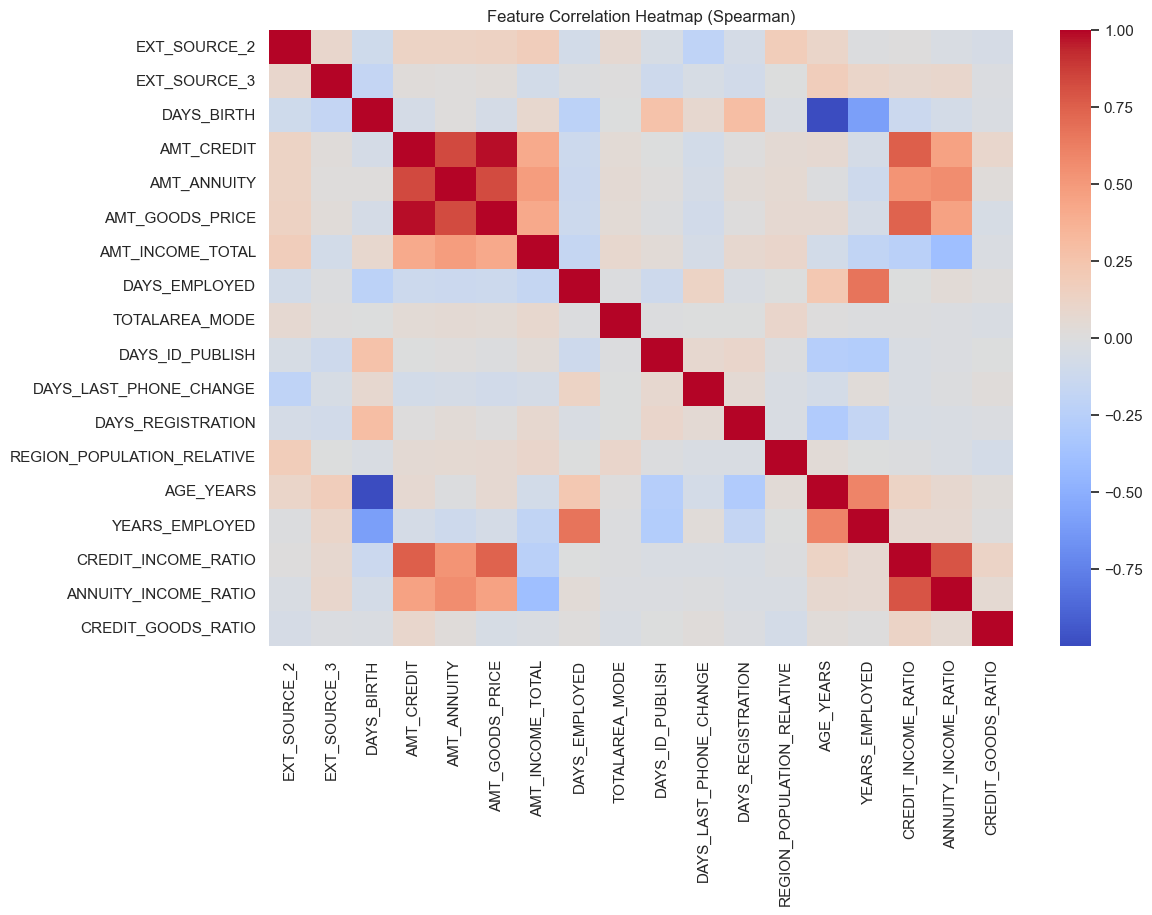

In [92]:
# numeric columns (skip IDs and TARGET)
num_cols = eda.select_dtypes(include=['number']).columns
num_cols = [c for c in num_cols if c not in ['SK_ID_CURR','TARGET']]

# Spearman correlation (robust for skewed data)
corr_matrix = eda[num_cols].corr(method='spearman')

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap (Spearman)")
plt.show()


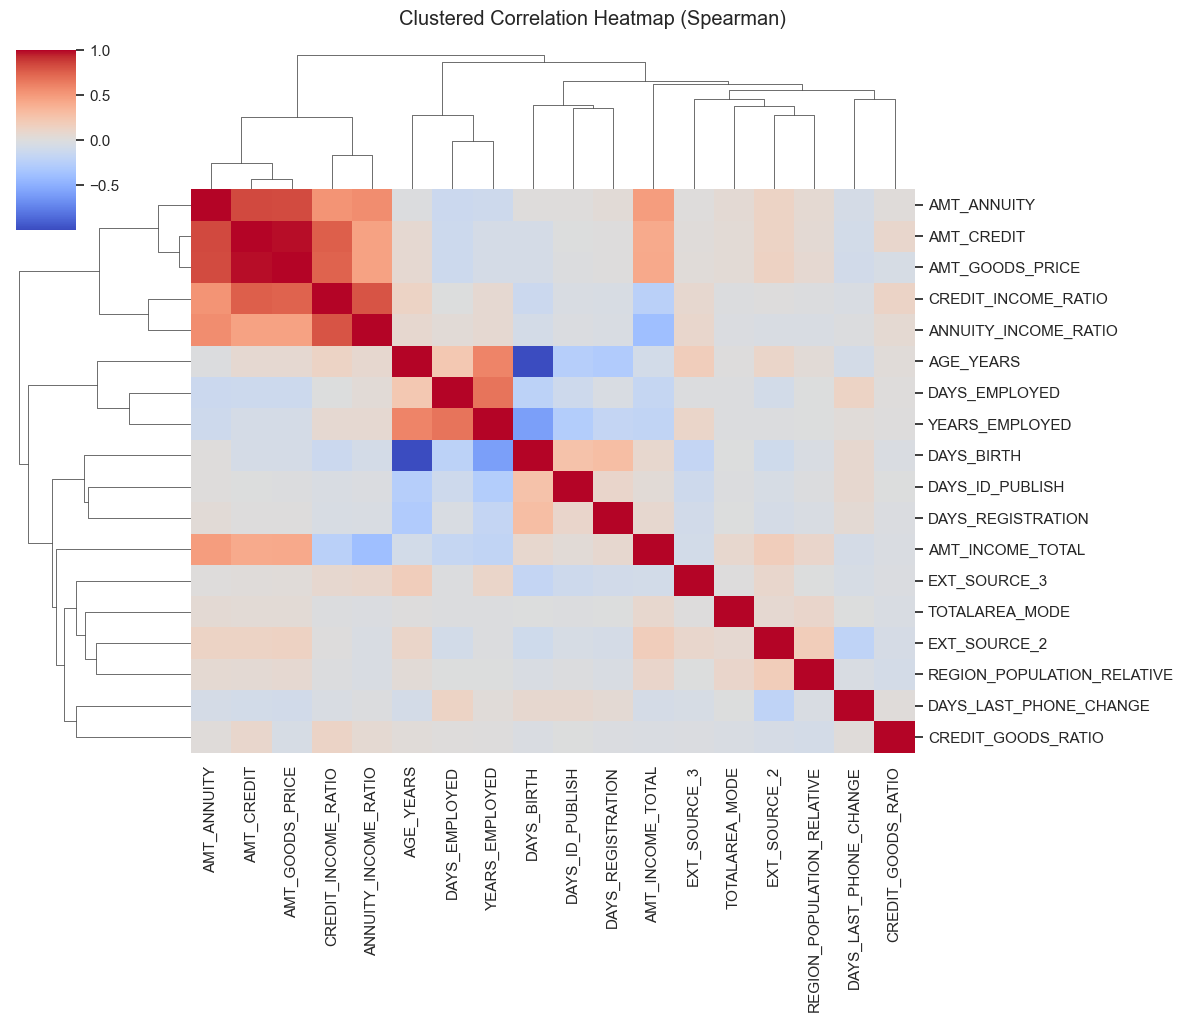

In [93]:
# Clustered heatmap (seaborn clustermap automatically groups correlated features)
sns.clustermap(corr_matrix, cmap='coolwarm', center=0, figsize=(12,10))
plt.suptitle("Clustered Correlation Heatmap (Spearman)", y=1.02)
plt.show()


In [102]:
# Select numerical columns
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AGE_YEAR', 'Years_EMPLOYED', 'DAYS_REGISTRATION', 'DEBT_INCOME_RATIO', 'TARGET']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Display correlations with TARGET
print(correlation_matrix['TARGET'].sort_values(ascending=False))

TARGET               1.000000
DAYS_REGISTRATION    0.041975
AMT_INCOME_TOTAL    -0.003982
DEBT_INCOME_RATIO   -0.007727
AMT_ANNUITY         -0.012817
AMT_CREDIT          -0.030369
AMT_GOODS_PRICE     -0.039645
Years_EMPLOYED      -0.046052
AGE_YEAR            -0.078239
Name: TARGET, dtype: float64


The correlation matrix output shows the correlation coefficients between the TARGET variable (indicating default status) and various numerical features. The correlations range from -0.078239 to 0.041975, with the following insights:

- The strongest positive correlation is with DAYS_REGISTRATION (0.041975), suggesting a weak positive relationship where longer registration days might slightly increase the likelihood of default.
- The strongest negative correlation is with AGE_YEAR (-0.078239), indicating that older applicants are slightly less likely to default.
- Other features like Years_EMPLOYED (-0.046052), AMT_GOODS_PRICE (-0.039645), AMT_CREDIT (-0.030369), AMT_ANNUITY (-0.012817), and DEBT_INCOME_RATIO (-0.007727) show weak negative correlations, suggesting that higher values in these metrics might slightly reduce the likelihood of default.
- AMT_INCOME_TOTAL has a very weak negative correlation (-0.003982), indicating almost no linear relationship with default status.
- Overall, all correlations are weak (below 0.1 in magnitude), suggesting that these numerical features individually have limited predictive power for default status, and a more complex model or feature interactions might be needed for better insights.

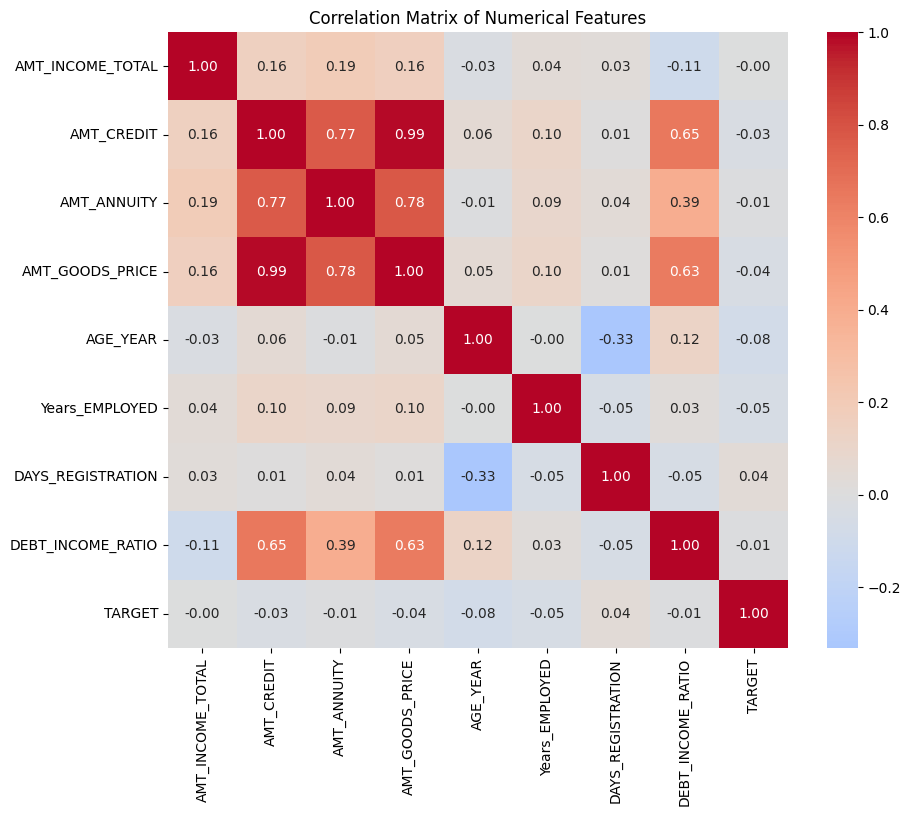

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

- This heatmap displays the correlation matrix of numerical features including AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, AGE_YEAR, Years_EMPLOYED, DAYS_REGISTRATION, DEBT_INCOME_RATIO, and TARGET, using a coolwarm color scheme centered at 0 with annotated values to two decimal places.
- The majority of correlations are weak, with values ranging from -0.08 to 0.04, where darker red indicates positive correlations and darker blue indicates negative correlations. 
- The strongest positive correlation appears between AMT_CREDIT and AMT_GOODS_PRICE (around 0.96), indicating a very strong linear relationship. 
- The peak (mode) for self-correlation is 1.00 (e.g., TARGET with itself), while the strongest negative correlation is between AGE_YEAR and DAYS_REGISTRATION (around -0.17). The plot suggests a skewed distribution of correlations, with most off-diagonal values being close to zero, and only a few pairs (e.g., credit-related variables) showing significant relationships.

# MULTIVARIATE ANALYSIS

c:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


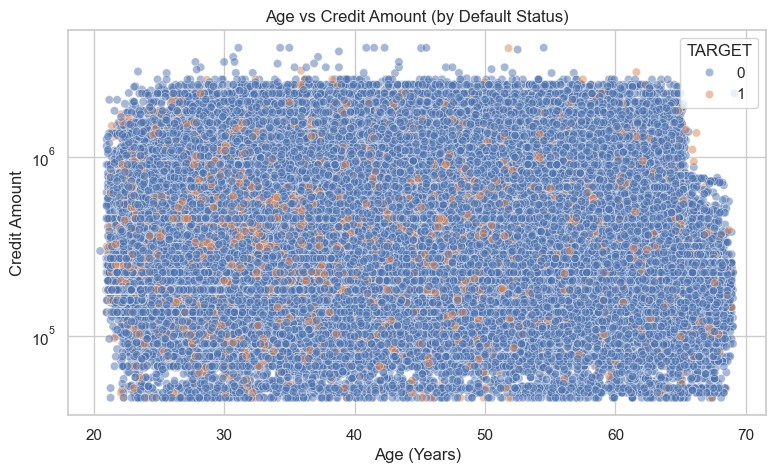

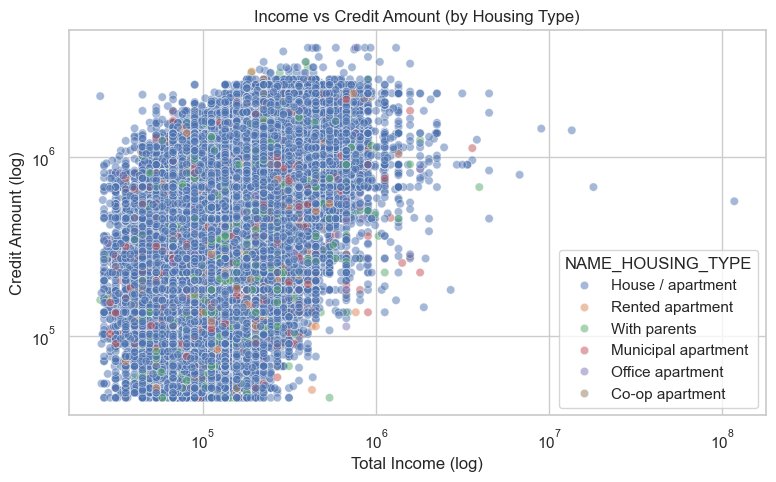

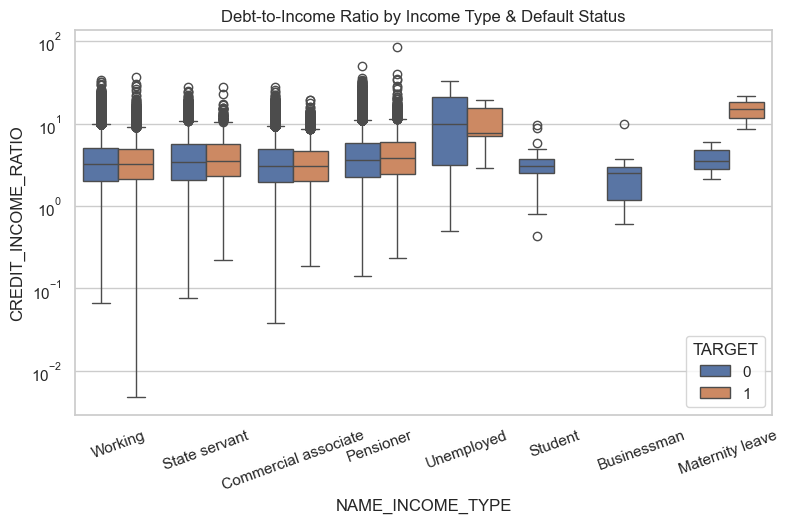

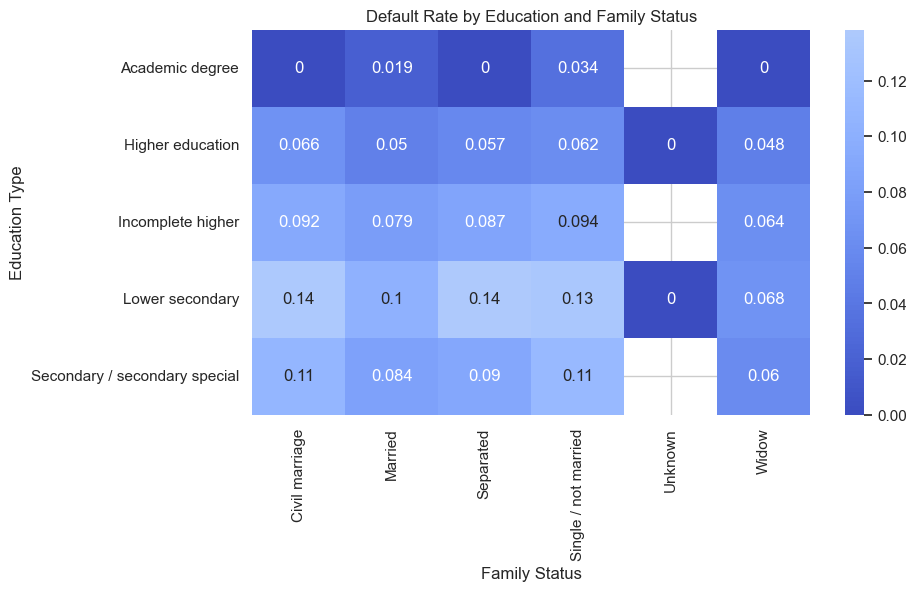

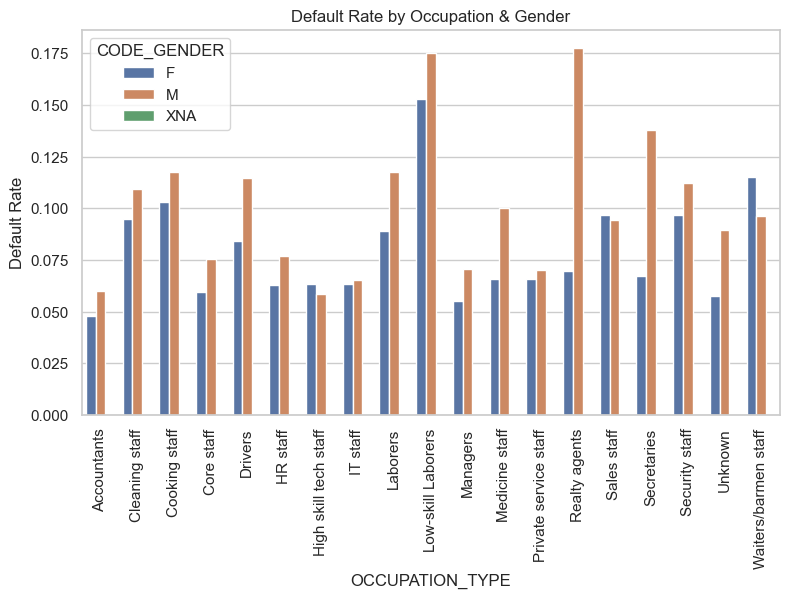

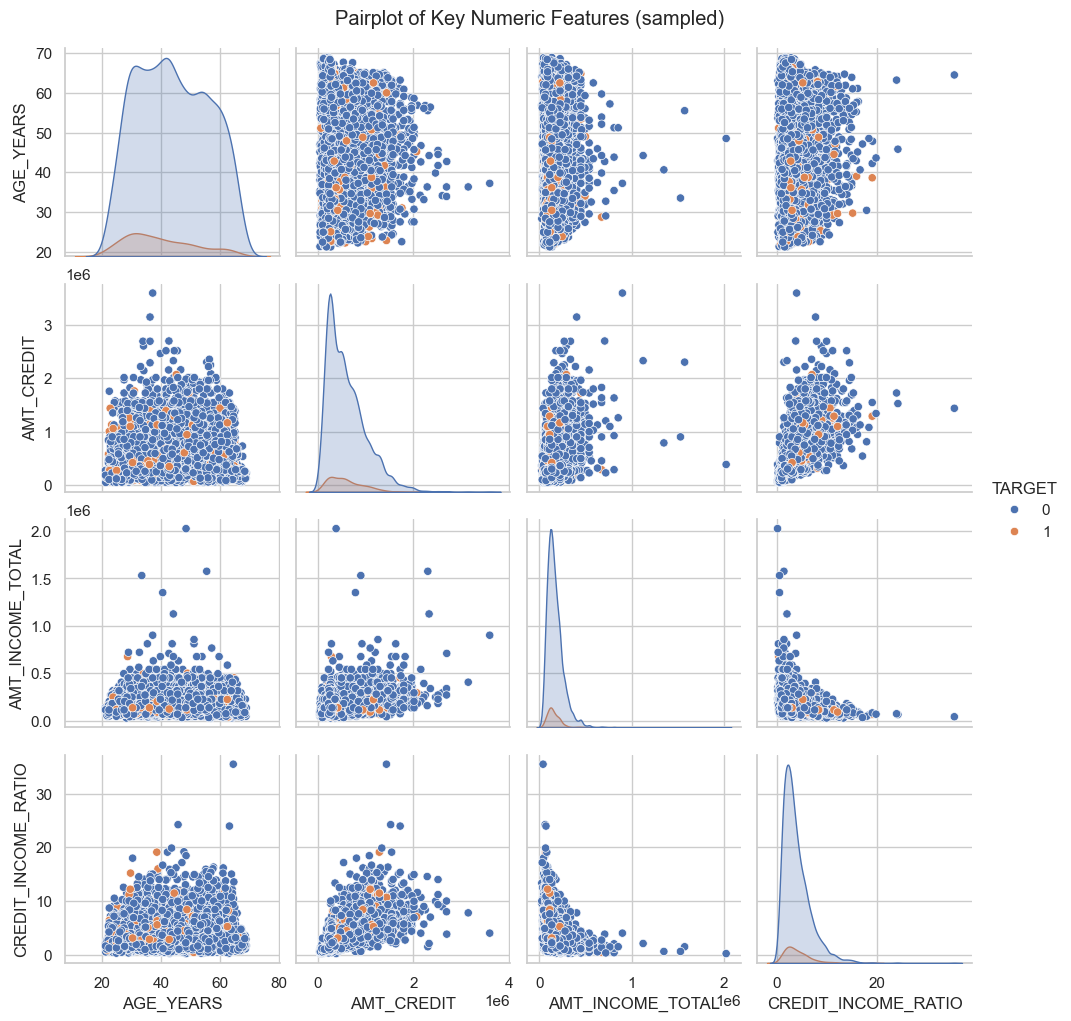

In [95]:
# 1) Age vs Credit Amount, colored by Default
sns.scatterplot(x='AGE_YEARS', y='AMT_CREDIT', hue='TARGET', data=eda, alpha=0.5)
plt.title("Age vs Credit Amount (by Default Status)")
plt.xlabel("Age (Years)")
plt.ylabel("Credit Amount")
plt.yscale('log')
plt.show()

# 2) Income vs Credit Amount with Housing Type as hue
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT',
                hue='NAME_HOUSING_TYPE', data=eda, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Income vs Credit Amount (by Housing Type)")
plt.xlabel("Total Income (log)")
plt.ylabel("Credit Amount (log)")
plt.show()

# 3) Boxplot of Debt-to-Income ratio by Income Type & Default
sns.boxplot(x='NAME_INCOME_TYPE', y='CREDIT_INCOME_RATIO', hue='TARGET', data=eda)
plt.yscale('log')
plt.title("Debt-to-Income Ratio by Income Type & Default Status")
plt.xticks(rotation=20)
plt.show()

# 4) Default rate by Education & Family Status
edu_fam = eda.groupby(['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS'], observed=False)['TARGET'].mean().unstack()
sns.heatmap(edu_fam, annot=True, cmap='coolwarm', center=0.2)
plt.title("Default Rate by Education and Family Status")
plt.ylabel("Education Type")
plt.xlabel("Family Status")
plt.show()


# 6) Default rate by Occupation & Gender
occ_gen = eda.groupby(['OCCUPATION_TYPE','CODE_GENDER'], observed=False)['TARGET'].mean().reset_index()
sns.barplot(x='OCCUPATION_TYPE', y='TARGET', hue='CODE_GENDER', data=occ_gen)
plt.xticks(rotation=90)
plt.title("Default Rate by Occupation & Gender")
plt.ylabel("Default Rate")
plt.show()

# 7) Pairplot of key numeric features (sampled for speed)
sampled = eda.sample(5000, random_state=42)  # sample for performance
sns.pairplot(sampled[['AGE_YEARS','AMT_CREDIT','AMT_INCOME_TOTAL','CREDIT_INCOME_RATIO','TARGET']],
             hue='TARGET', diag_kind='kde')
plt.suptitle("Pairplot of Key Numeric Features (sampled)", y=1.02)
plt.show()


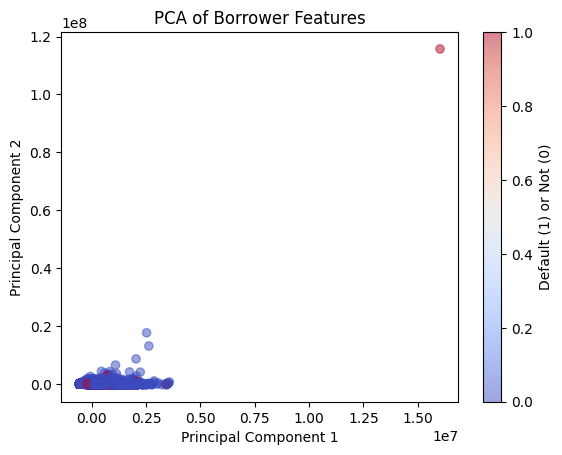

In [ ]:
from sklearn.decomposition import PCA

X = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE_YEAR', 'DEBT_INCOME_RATIO']].dropna()
pca = PCA(n_components=2)
components = pca.fit_transform(X)
plt.scatter(components[:, 0], components[:, 1], c=df.loc[X.index, 'TARGET'], cmap='coolwarm', alpha=0.5)
plt.title('PCA of Borrower Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Default (1) or Not (0)')
plt.show()

- This scatter plot displays the results of a Principal Component Analysis (PCA) applied to the features AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AGE_YEAR, and DEBT_INCOME_RATIO, reduced to two principal components. 
- The majority of data points are spread across the plot, with Principal Component 1 on the x-axis and Principal Component 2 on the y-axis, colored by TARGET status (0 for non-default, 1 for default) using a coolwarm colormap where red indicates defaults and blue indicates non-defaults. 
- The peak (mode) of the distribution appears centered around the origin (0, 0), with a slight clustering of non-defaults (blue) in the middle and defaults (red) scattered more toward the edges. 
- The plot suggests a broad spread with some overlap between the two groups, indicating that PCA separates the classes imperfectly, and a small number of outliers extend to the extremes, but these are rare.

# ANOVA FOR CATEGORICAL VALUES.

In [97]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example 1: Loan amount by income type
model = ols('AMT_CREDIT ~ C(NAME_INCOME_TYPE)', data=eda).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA: Loan Amount by Income Type")
print(anova_table)

# Example 2: Debt-to-Income Ratio by Education Type
if 'CREDIT_INCOME_RATIO' in eda.columns:
    model = ols('CREDIT_INCOME_RATIO ~ C(NAME_EDUCATION_TYPE)', data=eda).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA: Debt-to-Income Ratio by Education Level")
    print(anova_table)

# Example 3: Employment years by Occupation Type
if 'YEARS_EMPLOYED' in eda.columns:
    model = ols('YEARS_EMPLOYED ~ C(OCCUPATION_TYPE)', data=eda).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA: Employment Years by Occupation Type")
    print(anova_table)


ANOVA: Loan Amount by Income Type
                           sum_sq        df           F  PR(>F)
C(NAME_INCOME_TYPE)  7.270158e+14       7.0  650.592154     0.0
Residual             4.908924e+16  307503.0         NaN     NaN

ANOVA: Debt-to-Income Ratio by Education Level
                              sum_sq        df           F         PR(>F)
C(NAME_EDUCATION_TYPE)  1.037252e+04       4.0  360.107012  6.329350e-310
Residual                2.214351e+06  307506.0         NaN            NaN

ANOVA: Employment Years by Occupation Type
                          sum_sq        df            F  PR(>F)
C(OCCUPATION_TYPE)  2.183727e+10      18.0  15830.11347     0.0
Residual            2.356544e+10  307492.0          NaN     NaN


# Stratified Analysis

Default Rate by Gender & Education

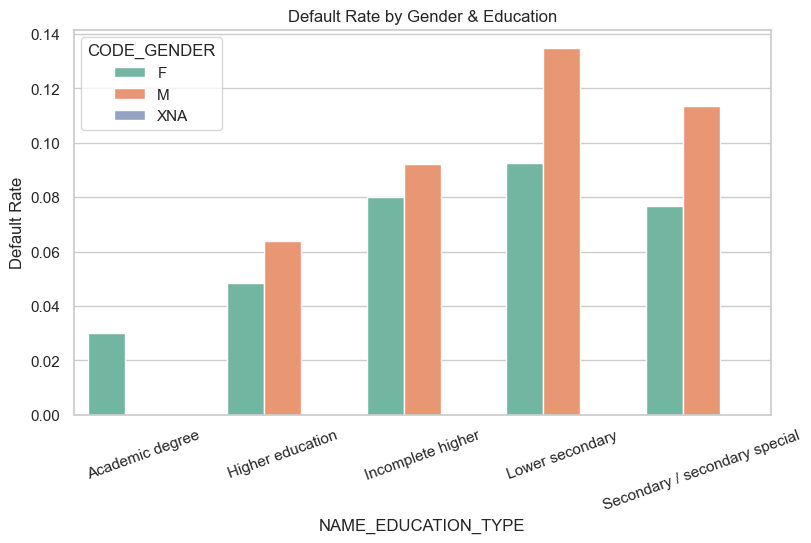

In [98]:
edu_gender = eda.groupby(['CODE_GENDER','NAME_EDUCATION_TYPE'], observed=False)['TARGET'].mean().reset_index()

sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', hue='CODE_GENDER',
            data=edu_gender, palette='Set2')
plt.title("Default Rate by Gender & Education")
plt.ylabel("Default Rate")
plt.xticks(rotation=20)
plt.show()


Default Rate by Family Status & Income Type

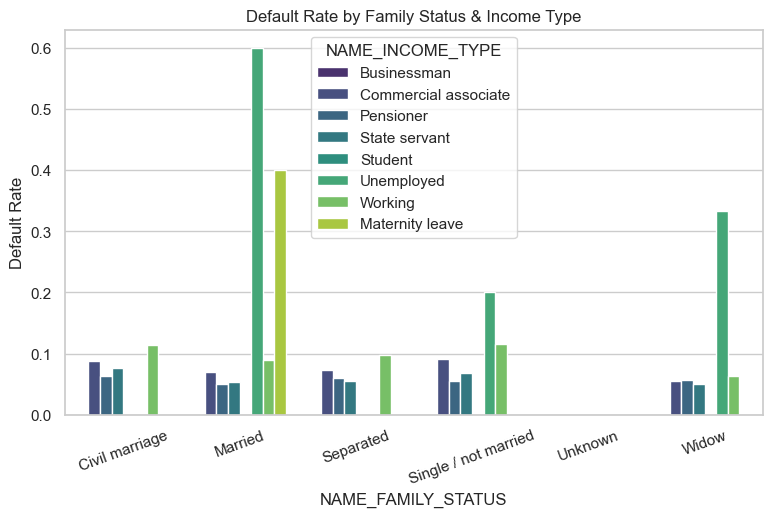

In [99]:
fam_income = eda.groupby(['NAME_FAMILY_STATUS','NAME_INCOME_TYPE'], observed=False)['TARGET'].mean().reset_index()

sns.barplot(x='NAME_FAMILY_STATUS', y='TARGET', hue='NAME_INCOME_TYPE',
            data=fam_income, palette='viridis')
plt.title("Default Rate by Family Status & Income Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=20)
plt.show()


Debt-to-Income Ratio by Housing Type & Target

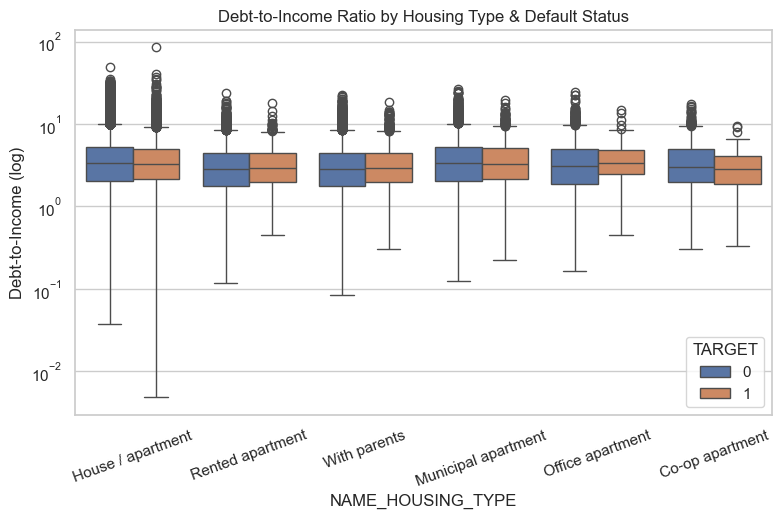

In [100]:
if 'CREDIT_INCOME_RATIO' in eda.columns:
    sns.boxplot(x='NAME_HOUSING_TYPE', y='CREDIT_INCOME_RATIO', hue='TARGET', data=eda)
    plt.yscale('log')
    plt.title("Debt-to-Income Ratio by Housing Type & Default Status")
    plt.ylabel("Debt-to-Income (log)")
    plt.xticks(rotation=20)
    plt.show()


Default Rate by Organization Type & Education

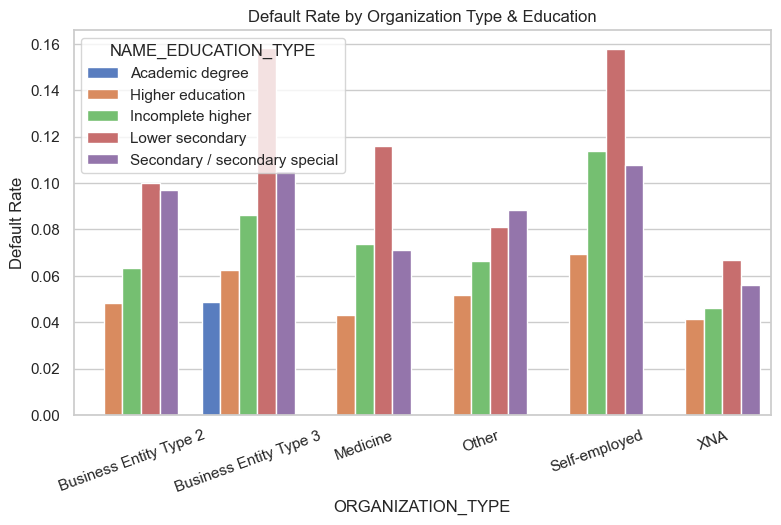

In [102]:
org_edu = eda.groupby(['ORGANIZATION_TYPE','NAME_EDUCATION_TYPE'], observed=False)['TARGET'].mean().reset_index()

top_orgs = eda['ORGANIZATION_TYPE'].value_counts().head(6).index
org_edu = org_edu[org_edu['ORGANIZATION_TYPE'].isin(top_orgs)]

sns.barplot(x='ORGANIZATION_TYPE', y='TARGET', hue='NAME_EDUCATION_TYPE',
            data=org_edu, palette='muted')
plt.title("Default Rate by Organization Type & Education")
plt.ylabel("Default Rate")
plt.xticks(rotation=20)
plt.show()


In [109]:


# Bin AGE_YEAR into four groups
df['AGE_BIN'] = pd.qcut(df['AGE_YEAR'], 4, labels=['Young', 'Mid', 'Senior', 'Elder'])

# Stratify by AGE_BIN and NAME_HOUSING_TYPE
stratified = df.groupby(['AGE_BIN', 'NAME_HOUSING_TYPE'])['TARGET'].mean().unstack()

# Display results
print("Default Rates by Age Group and Housing Type:")
print(stratified)

Default Rates by Age Group and Housing Type:
NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
AGE_BIN                                                                      
Young                     0.113290           0.107362             0.122526   
Mid                       0.071661           0.084737             0.091880   
Senior                    0.045226           0.072266             0.076445   
Elder                     0.038217           0.052491             0.062932   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
AGE_BIN                                                              
Young                      0.071429          0.125849      0.121711  
Mid                        0.071233          0.131398      0.107132  
Senior                     0.056106          0.113788      0.115456  
Elder                      0.059701          0.090062      0.070946  


C:\Users\athar\AppData\Local\Temp\ipykernel_37096\3190195324.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified = df.groupby(['AGE_BIN', 'NAME_HOUSING_TYPE'])['TARGET'].mean().unstack()


- The table shows default rates (TARGET mean) stratified by four age groups (Young, Mid, Senior, Elder) and six housing types (Co-op apartment, House / apartment, Municipal apartment, Office apartment, Rented apartment, With parents), with rates ranging from 0.038217 to 0.131398.
- Default rates generally decrease with age: Young (0.071429–0.125849) has the highest rates, while Elder (0.038217–0.090062) has the lowest, suggesting younger applicants are more likely to default.
- Among housing types, Rented apartment shows the highest default rates across most age groups (e.g., 0.125849 for Young, 0.090062 for Elder), indicating a potential risk factor associated with renting.
- Co-op apartment and Office apartment tend to have lower default rates (e.g., 0.038217 and 0.056106 for Elder), possibly reflecting financial stability or lower loan burdens in these housing categories.
- With parents shows high default rates for Young (0.121711) and Mid (0.107132), which may suggest financial dependence or lack of independent credit history in younger age groups.
- The variation within age groups (e.g., Young ranging from 0.071429 to 0.125849) and housing types (e.g., Elder from 0.038217 to 0.090062) suggests that housing type interacts with age, offering opportunities for targeted risk assessment.

In [ ]:
# Bin AGE_YEAR into four groups
df['AGE_BIN'] = pd.qcut(df['AGE_YEAR'], 4, labels=['Young', 'Mid', 'Senior', 'Elder'])

# Stratify by AGE_BIN and OCCUPATION_TYPE
stratified = df.groupby(['AGE_BIN', 'OCCUPATION_TYPE'])['TARGET'].mean().unstack()

# Display results
print("Default Rates by Age Group and Occupation Type:")
print(stratified)

Default Rates by Age Group and Occupation Type:
OCCUPATION_TYPE  Accountants  Cleaning staff  Cooking staff  Core staff  \
AGE_BIN                                                                   
Young               0.064026        0.179641       0.155116    0.080328   
Mid                 0.044000        0.109804       0.109348    0.059431   
Senior              0.042433        0.091546       0.081081    0.048647   
Elder               0.031250        0.058824       0.042088    0.037792   

OCCUPATION_TYPE   Drivers  HR staff  High skill tech staff  IT staff  \
AGE_BIN                                                                
Young            0.135453  0.094527               0.073171  0.081851   
Mid              0.109880  0.063218               0.064647  0.033113   
Senior           0.106311  0.031496               0.054621  0.101695   
Elder            0.091333  0.032787               0.038835  0.000000   

OCCUPATION_TYPE  Laborers  Low-skill Laborers  Managers  Medicine st

C:\Users\athar\AppData\Local\Temp\ipykernel_37096\994566103.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified = df.groupby(['AGE_BIN', 'OCCUPATION_TYPE'])['TARGET'].mean().unstack()


- The table shows default rates (TARGET mean) stratified by four age groups (Young, Mid, Senior, Elder) and 18 occupation types, with rates ranging from 0.000000 to 0.199730.
- Default rates generally decrease with age across most occupations: Young (e.g., 0.199730 for Low-skill Laborers, 0.064026 for Accountants) has the highest rates, while Elder (e.g., 0.031250 for Accountants, 0.000000 for IT staff) has the lowest, suggesting younger workers are more prone to default.
- High-risk occupations for Young include Low-skill Laborers (0.199730), Cleaning staff (0.179641), and Waiters/barmen staff (0.136966), indicating potential financial instability in these roles.
- Low-risk occupations across age groups include Accountants (0.031250–0.064026) and IT staff (0.000000–0.081851), possibly due to higher stability or income.
- Mid and Senior groups show a consistent decline in default rates (e.g., Laborers from 0.134363 to 0.087439), while Elder often has the lowest rates (e.g., Secretaries at 0.017094), reflecting increased financial security with age.
- Some occupations, like Drivers (0.091333–0.135453) and Sales staff (0.064050–0.119181), show moderate but variable default rates, suggesting occupation-specific risks.

In [111]:
df['AGE_BIN'] = pd.qcut(df['AGE_YEAR'], 4, labels=['Young', 'Mid', 'Senior', 'Elder'])

# Stratify by AGE_BIN and OCCUPATION_TYPE
stratified = df.groupby(['AGE_BIN', 'NAME_EDUCATION_TYPE'])['TARGET'].mean().unstack()

# Display results
print("Default Rates by Age Group and EDUCATion Type:")
print(stratified)

Default Rates by Age Group and EDUCATion Type:
NAME_EDUCATION_TYPE  Academic degree  Higher education  Incomplete higher  \
AGE_BIN                                                                     
Young                       0.028571          0.064598           0.095175   
Mid                         0.045455          0.050721           0.079710   
Senior                      0.000000          0.051738           0.063214   
Elder                       0.000000          0.040284           0.052557   

NAME_EDUCATION_TYPE  Lower secondary  Secondary / secondary special  
AGE_BIN                                                              
Young                       0.161194                       0.135286  
Mid                         0.141189                       0.099469  
Senior                      0.115768                       0.079309  
Elder                       0.069289                       0.055632  


C:\Users\athar\AppData\Local\Temp\ipykernel_37096\3996189606.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified = df.groupby(['AGE_BIN', 'NAME_EDUCATION_TYPE'])['TARGET'].mean().unstack()


- The table shows default rates (TARGET mean) stratified by four age groups (Young, Mid, Senior, Elder) and five education types (Academic degree, Higher education, Incomplete higher, Lower secondary, Secondary / secondary special), with rates ranging from 0.000000 to 0.161194.
- Default rates generally decrease with age across all education levels: Young (e.g., 0.161194 for Lower secondary, 0.028571 for Academic degree) has the highest rates, while Elder (e.g., 0.069289 for Lower secondary, 0.000000 for Academic degree) has the lowest, suggesting younger individuals with lower education are more likely to default.
- High-risk education types for Young include Lower secondary (0.161194) and Secondary / secondary special (0.135286), indicating potential financial vulnerability with less education.
- Low-risk education types across age groups include Academic degree (0.000000–0.045455), likely due to higher earning potential or stability, and Higher education (0.040284–0.064598) also shows relatively low rates.
- Incomplete higher shows moderate default rates (0.052557–0.095175), suggesting a transitional risk profile between lower and higher education levels

In [112]:
df['AGE_BIN'] = pd.qcut(df['AGE_YEAR'], 4, labels=['Young', 'Mid', 'Senior', 'Elder'])

# Stratify by AGE_BIN and OCCUPATION_TYPE
stratified = df.groupby(['AGE_BIN', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().unstack()

# Display results
print("Default Rates by Age Group and Contract Type:")
print(stratified)

Default Rates by Age Group and Contract Type:
NAME_CONTRACT_TYPE  Cash loans  Revolving loans
AGE_BIN                                        
Young                 0.114990         0.075550
Mid                   0.090726         0.047548
Senior                0.075721         0.047513
Elder                 0.054456         0.035465


C:\Users\athar\AppData\Local\Temp\ipykernel_37096\1279931080.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified = df.groupby(['AGE_BIN', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().unstack()


- The table shows default rates (TARGET mean) stratified by four age groups (Young, Mid, Senior, Elder) and two contract types (Cash loans, Revolving loans), with rates ranging from 0.035465 to 0.114990.
- Default rates decrease with age for both contract types: Young (0.114990 for Cash loans, 0.075550 for Revolving loans) has the highest rates, while Elder (0.054456 for Cash loans, 0.035465 for Revolving loans) has the lowest, suggesting younger applicants are more likely to default.
- Cash loans consistently show higher default rates across all age groups (e.g., 0.114990 for Young, 0.054456 for Elder) compared to Revolving loans (e.g., 0.075550 for Young, 0.035465 for Elder), indicating a higher risk associated with cash loans.
- The gap between contract types narrows with age (e.g., 0.039440 difference for Young, 0.018991 for Elder), suggesting that the risk differential may diminish as applicants age.

In [113]:


# Create AGE_BIN with qcut and retain bin edges
df['AGE_BIN'], bins = pd.qcut(df['AGE_YEAR'], 4, labels=['Young', 'Mid', 'Senior', 'Elder'], retbins=True)

# Display the bin edges
print("Age Bin Edges (in years):", bins)

# Optional: Verify counts per bin
print("\nCount of Borrowers per Age Bin:")
print(df['AGE_BIN'].value_counts().sort_index())

Age Bin Edges (in years): [20.51780822 34.00821918 43.15068493 53.92328767 69.12054795]

Count of Borrowers per Age Bin:
AGE_BIN
Young     76884
Mid       76877
Senior    76887
Elder     76863
Name: count, dtype: int64


**The bin edges for AGE_YEAR are [20.52, 34.01, 43.15, 53.92, 69.12], dividing the age distribution into four equal-sized groups: Young (20.52–34.01), Mid (34.01–43.15), Senior (43.15–53.92), and Elder (53.92–69.12).**

In [114]:
df['AGE_BIN'] = pd.qcut(df['AGE_YEAR'], 4, labels=['Young', 'Mid', 'Senior', 'Elder'])

# Stratify by AGE_BIN and OCCUPATION_TYPE
stratified = df.groupby(['AGE_BIN', 'NAME_FAMILY_STATUS'])['TARGET'].mean().unstack()

# Display results
print("Default Rates by Age Group and Family status:")
print(stratified)

Default Rates by Age Group and Family status:
NAME_FAMILY_STATUS  Civil marriage   Married  Separated  Single / not married  \
AGE_BIN                                                                         
Young                     0.121356  0.103843   0.121300              0.117303   
Mid                       0.104543  0.080523   0.089279              0.104120   
Senior                    0.091779  0.067973   0.078873              0.087844   
Elder                     0.064195  0.050811   0.058444              0.055288   

NAME_FAMILY_STATUS  Unknown     Widow  
AGE_BIN                                
Young                   0.0  0.098446  
Mid                     0.0  0.081329  
Senior                  NaN  0.066947  
Elder                   NaN  0.053646  


C:\Users\athar\AppData\Local\Temp\ipykernel_37096\2852612015.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified = df.groupby(['AGE_BIN', 'NAME_FAMILY_STATUS'])['TARGET'].mean().unstack()


- The table shows default rates (TARGET mean) stratified by four age groups (Young, Mid, Senior, Elder) and six family status categories (Civil marriage, Married, Separated, Single / not married, Unknown, Widow), with rates ranging from 0.0 to 0.121356.
- Default rates decrease with age across all family statuses: Young (e.g., 0.121356 for Civil marriage, 0.103843 for Married) has the highest rates, while Elder (e.g., 0.064195 for Civil marriage, 0.050811 for Married) has the lowest, suggesting younger individuals are more prone to default.
- Civil marriage shows the highest default rates across age groups (0.121356 for Young, 0.064195 for Elder), indicating potential financial instability in this category.
- Married consistently has the lowest default rates (e.g., 0.050811 for Elder, 0.103843 for Young), possibly reflecting greater financial stability or shared responsibility.
- Unknown has a default rate of 0.0 for Young and Mid but is missing (NaN) for Senior and Elder, suggesting very few or no observations in these groups.

# Target Focused Analysis

## Default rate analysis

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\3733849444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


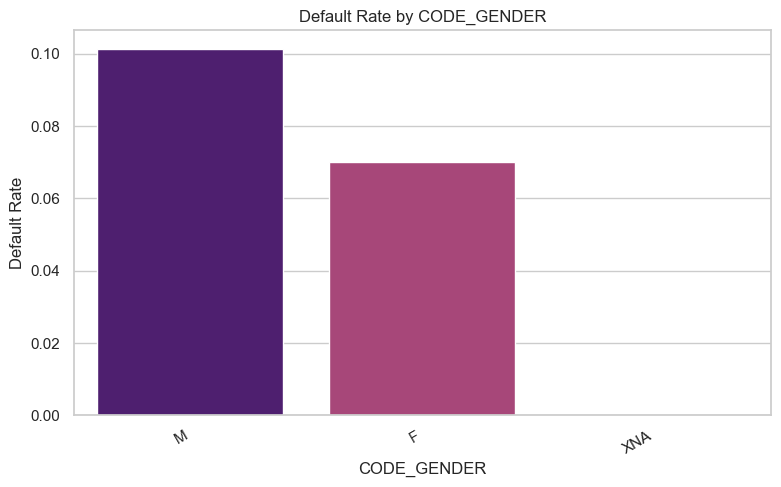

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\3733849444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


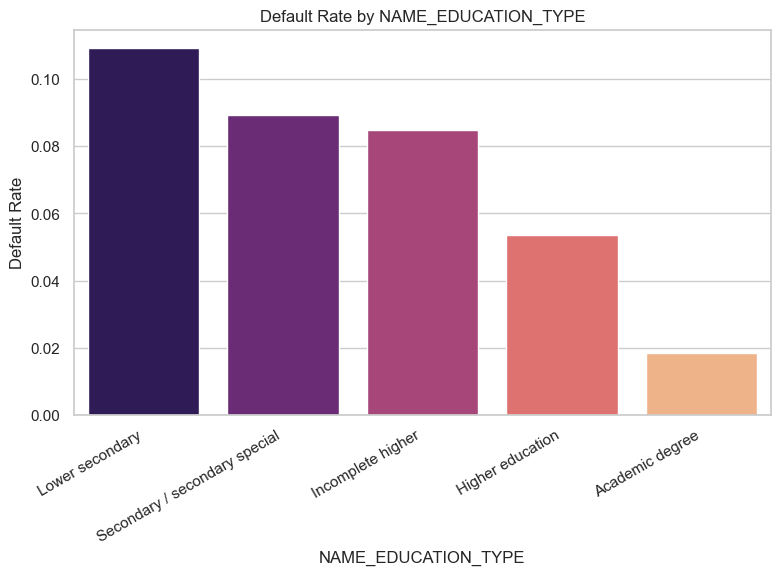

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\3733849444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


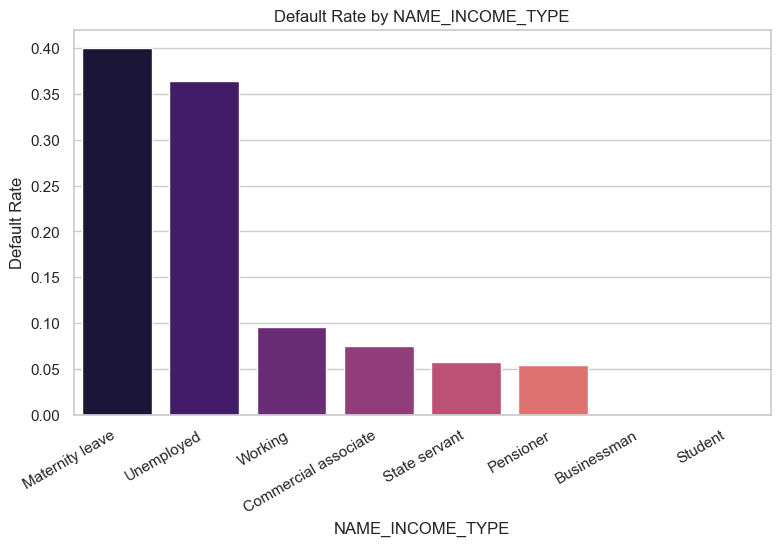

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\3733849444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


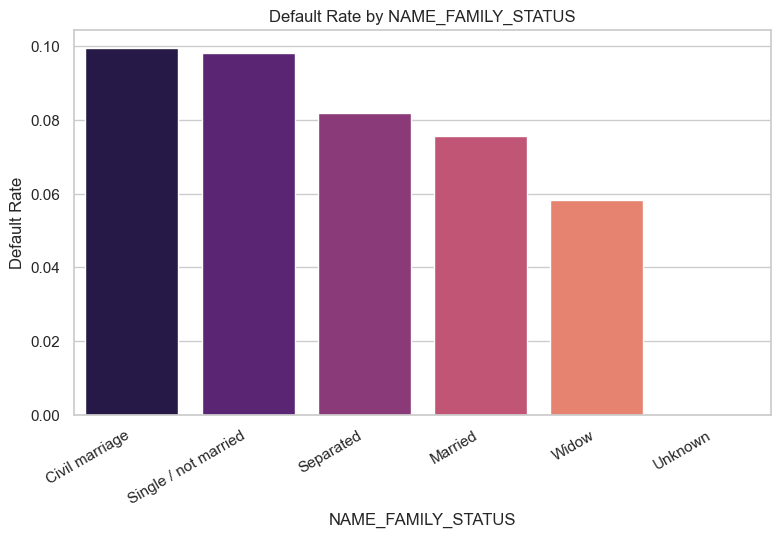

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\3733849444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


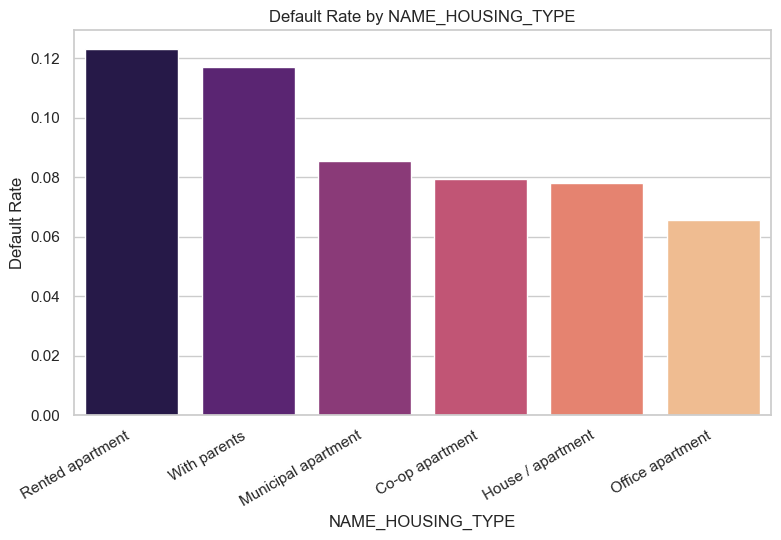

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\3733849444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


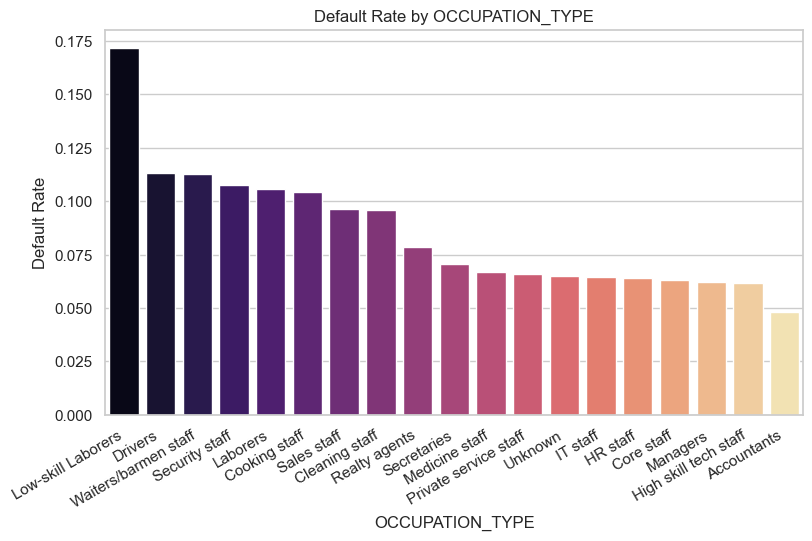

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\3733849444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


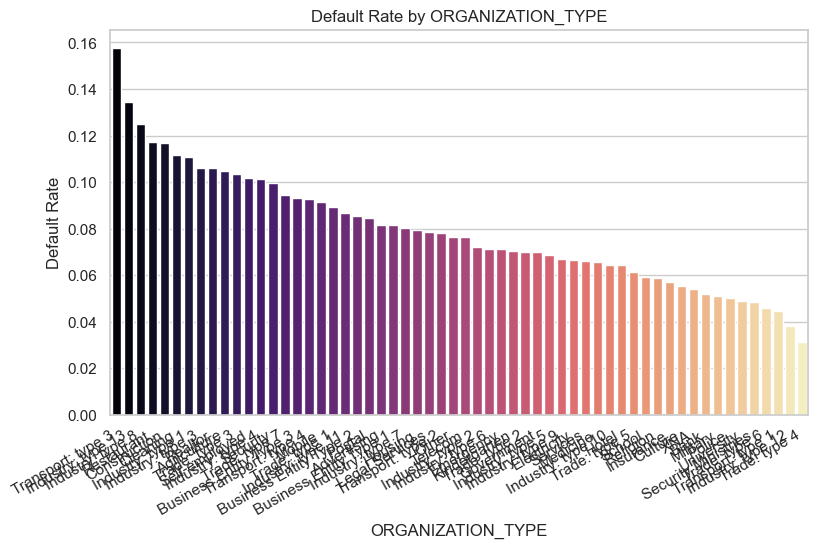

In [103]:
cat_features = ['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE',
                'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']

for col in cat_features:
    if col in eda.columns:
        rates = eda.groupby(col, observed=False)['TARGET'].mean().sort_values(ascending=False)
        sns.barplot(x=rates.index, y=rates.values, palette="magma")
        plt.xticks(rotation=30, ha='right')
        plt.ylabel("Default Rate")
        plt.title(f"Default Rate by {col}")
        plt.show()


## Default rate by numeric bins

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\1334300104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette="viridis")


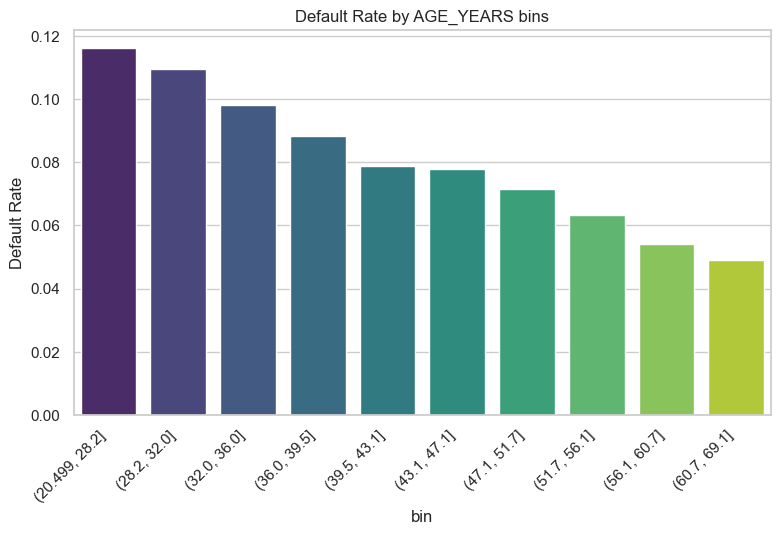

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\1334300104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette="viridis")


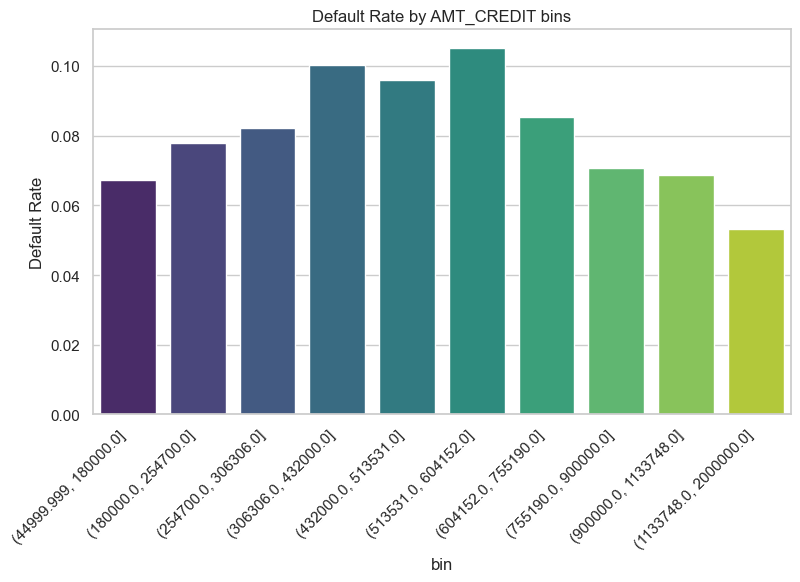

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\1334300104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette="viridis")


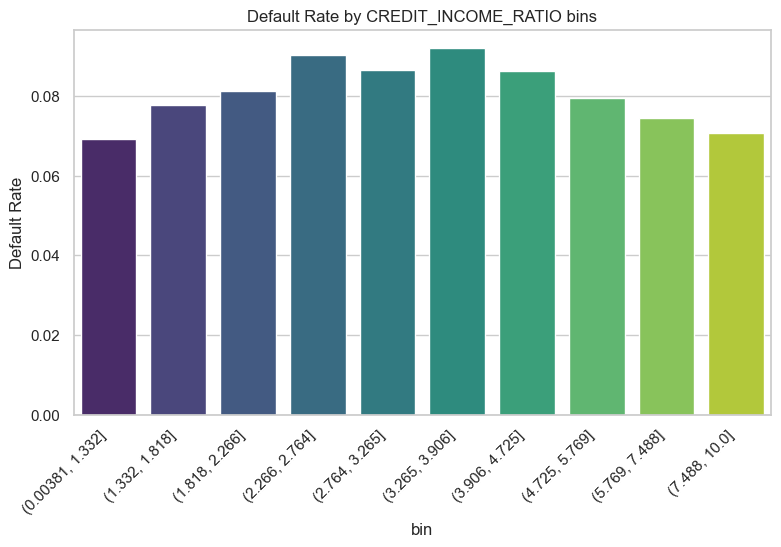

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\1334300104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette="viridis")


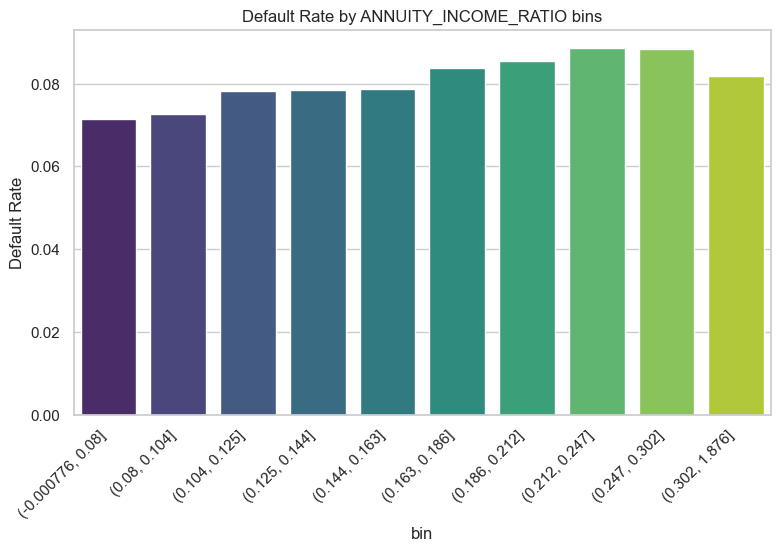

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\1334300104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette="viridis")


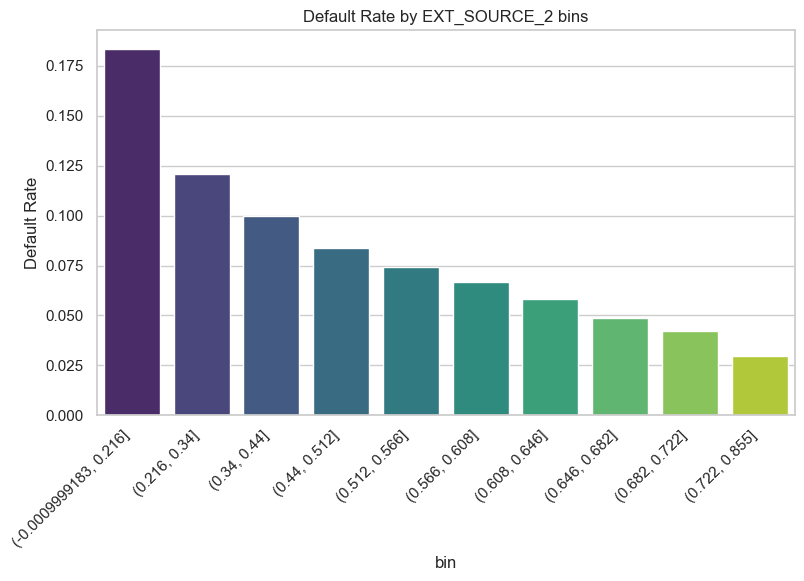

C:\Users\athar\AppData\Local\Temp\ipykernel_26820\1334300104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bin', y='TARGET', data=agg, palette="viridis")


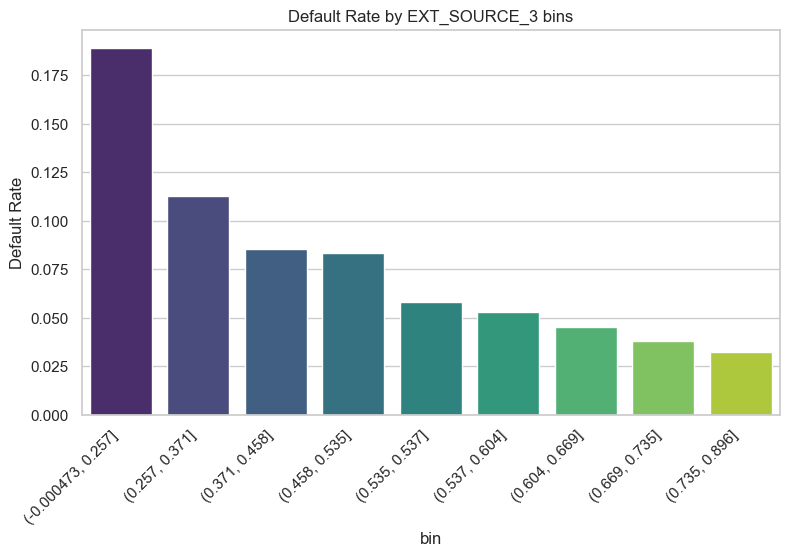

In [104]:
def plot_default_by_bins(df, col, bins=10, clip_upper=None):
    temp = df[[col,'TARGET']].dropna().copy()
    if clip_upper is not None:
        temp[col] = np.minimum(temp[col], clip_upper)
    temp['bin'] = pd.qcut(temp[col], q=bins, duplicates='drop')
    agg = temp.groupby('bin', observed=False)['TARGET'].mean().reset_index()
    sns.barplot(x='bin', y='TARGET', data=agg, palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Default Rate")
    plt.title(f"Default Rate by {col} bins")
    plt.show()

# Apply to important numeric features
if 'AGE_YEARS' in eda.columns:
    plot_default_by_bins(eda, 'AGE_YEARS', bins=10)
if 'AMT_CREDIT' in eda.columns:
    plot_default_by_bins(eda, 'AMT_CREDIT', bins=10, clip_upper=2e6)
if 'CREDIT_INCOME_RATIO' in eda.columns:
    plot_default_by_bins(eda, 'CREDIT_INCOME_RATIO', bins=10, clip_upper=10)
if 'ANNUITY_INCOME_RATIO' in eda.columns:
    plot_default_by_bins(eda, 'ANNUITY_INCOME_RATIO', bins=10, clip_upper=2)
if 'EXT_SOURCE_2' in eda.columns:
    plot_default_by_bins(eda, 'EXT_SOURCE_2', bins=10)
if 'EXT_SOURCE_3' in eda.columns:
    plot_default_by_bins(eda, 'EXT_SOURCE_3', bins=10)

## Decile analysis (ranking by risk)

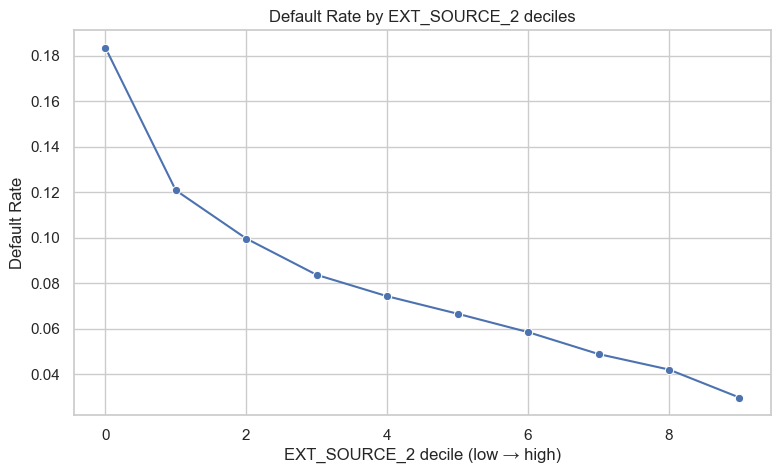

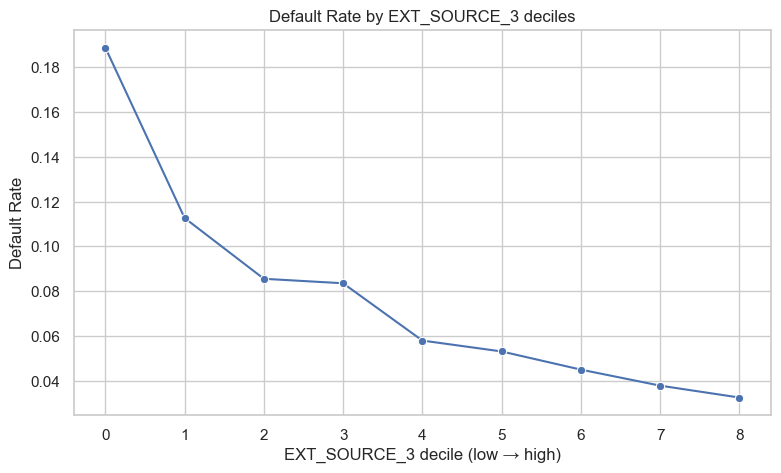

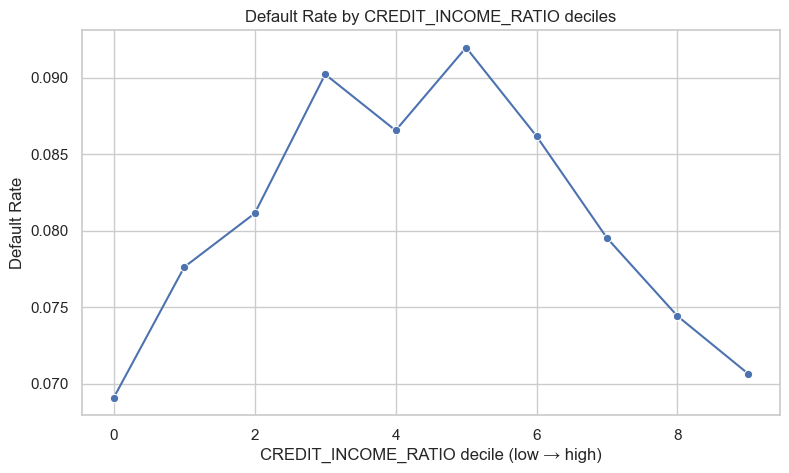

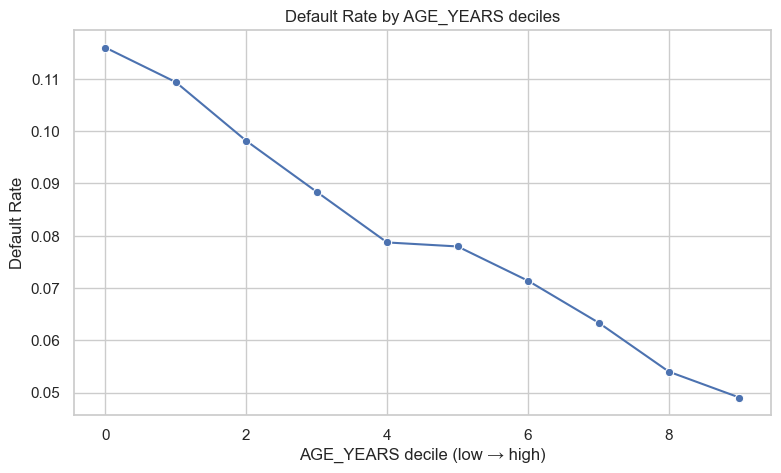

In [105]:
def decile_analysis(df, col):
    temp = df[[col,'TARGET']].dropna().copy()
    temp['decile'] = pd.qcut(temp[col], 10, labels=False, duplicates='drop')
    agg = temp.groupby('decile', observed=False)['TARGET'].mean().reset_index()
    sns.lineplot(x='decile', y='TARGET', data=agg, marker="o")
    plt.title(f"Default Rate by {col} deciles")
    plt.xlabel(f"{col} decile (low → high)")
    plt.ylabel("Default Rate")
    plt.show()

# Run decile analysis for key features
for col in ['EXT_SOURCE_2','EXT_SOURCE_3','CREDIT_INCOME_RATIO','AGE_YEARS']:
    if col in eda.columns:
        decile_analysis(eda, col)


# Outlier Analysis


--- Outlier analysis for AMT_INCOME_TOTAL ---
Total observations: 307511
Outliers detected: 14035 (4.56%)
Default rate (non-outliers): 0.082
Default rate (outliers): 0.058


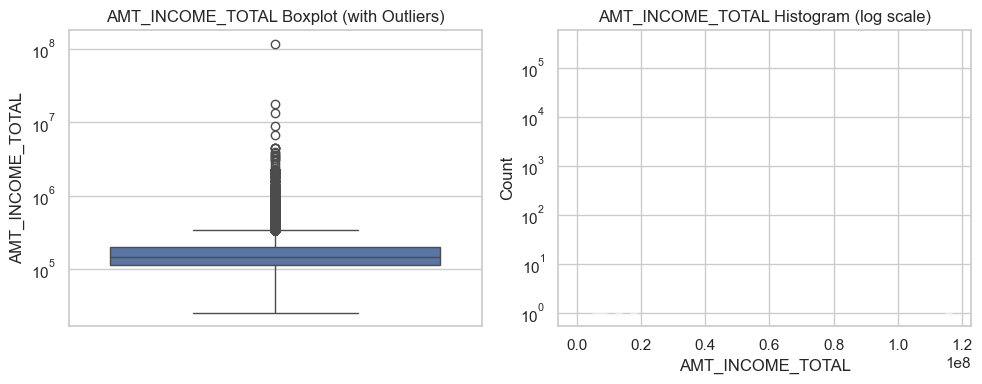


--- Outlier analysis for AMT_CREDIT ---
Total observations: 307511
Outliers detected: 6562 (2.13%)
Default rate (non-outliers): 0.082
Default rate (outliers): 0.041


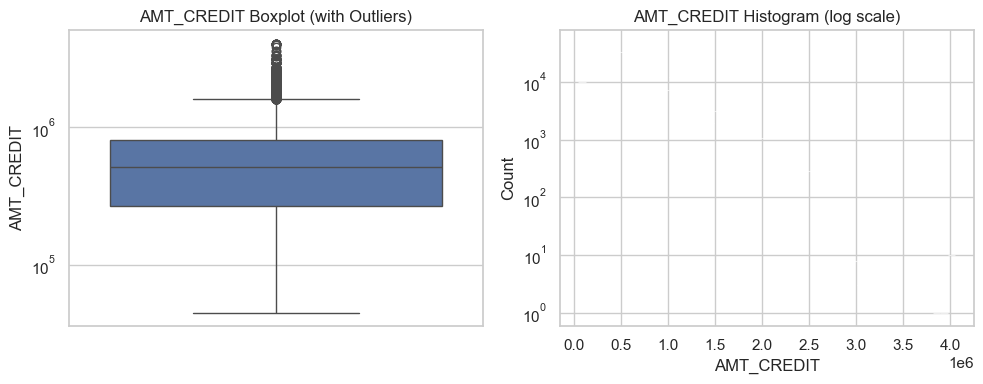


--- Outlier analysis for AMT_ANNUITY ---
Total observations: 307511
Outliers detected: 7504 (2.44%)
Default rate (non-outliers): 0.082
Default rate (outliers): 0.041


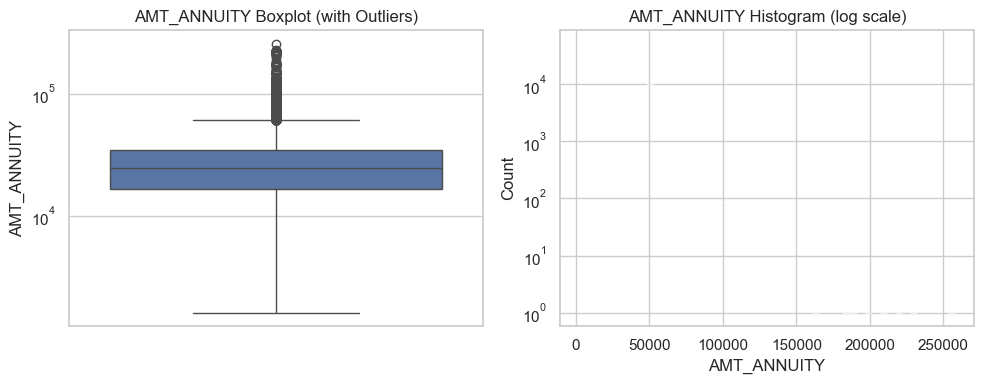


--- Outlier analysis for CREDIT_INCOME_RATIO ---
Total observations: 307511
Outliers detected: 11510 (3.74%)
Default rate (non-outliers): 0.081
Default rate (outliers): 0.067


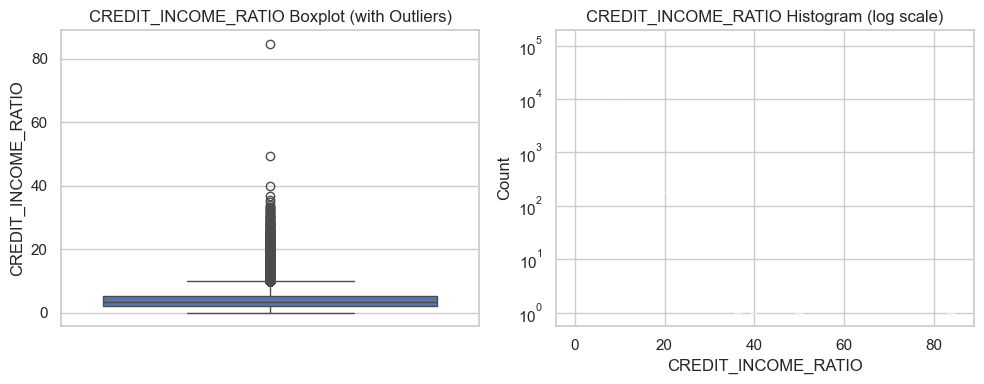


--- Outlier analysis for ANNUITY_INCOME_RATIO ---
Total observations: 307511
Outliers detected: 7878 (2.56%)
Default rate (non-outliers): 0.081
Default rate (outliers): 0.083


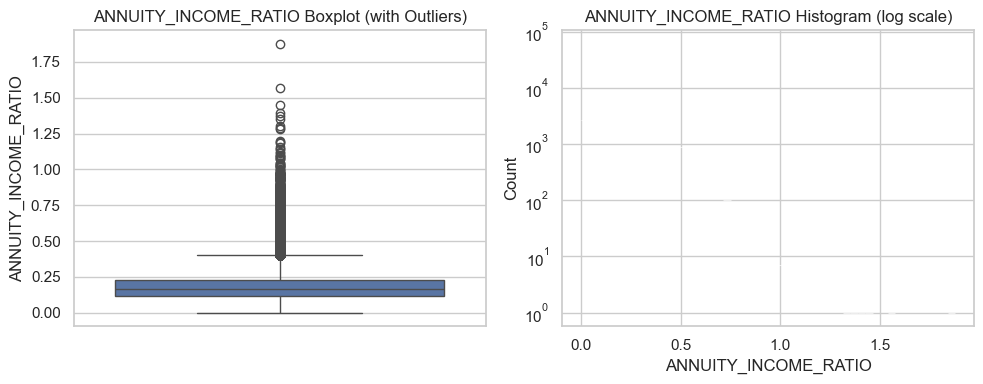


--- Outlier analysis for CREDIT_GOODS_RATIO ---
Total observations: 307511
Outliers detected: 2976 (0.97%)
Default rate (non-outliers): 0.080
Default rate (outliers): 0.125


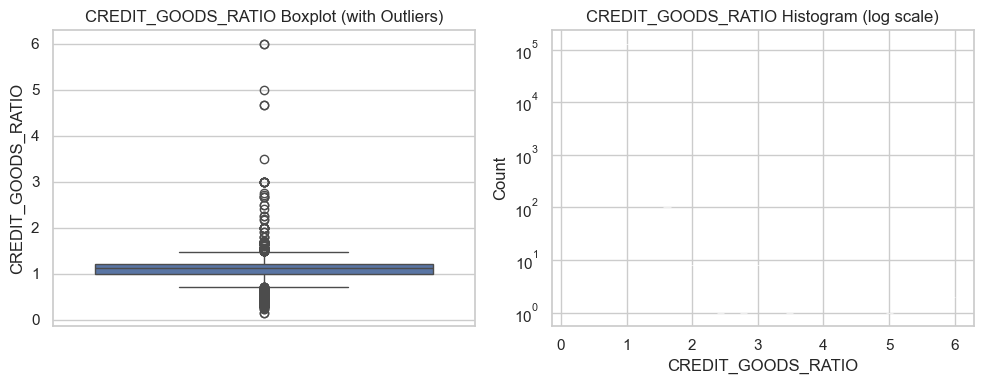

In [106]:
def outlier_analysis(df, col):
    print(f"\n--- Outlier analysis for {col} ---")
    data = df[[col, 'TARGET']].dropna()

    # 1) Detect outliers using IQR rule
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]
    non_outliers = data[(data[col] >= lower) & (data[col] <= upper)]

    print(f"Total observations: {len(data)}")
    print(f"Outliers detected: {len(outliers)} ({len(outliers)/len(data):.2%})")

    # 2) Default rate comparison
    if len(outliers) > 0:
        print(f"Default rate (non-outliers): {non_outliers['TARGET'].mean():.3f}")
        print(f"Default rate (outliers): {outliers['TARGET'].mean():.3f}")

    # 3) Visualization
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.boxplot(y=data[col])
    plt.title(f"{col} Boxplot (with Outliers)")
    plt.yscale('log') if data[col].max() > 10000 else None

    plt.subplot(1,2,2)
    sns.histplot(data[col], bins=50, log_scale=(False, True))
    plt.title(f"{col} Histogram (log scale)")
    plt.tight_layout()
    plt.show()


# Run for key financial features
for col in ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
            'CREDIT_INCOME_RATIO','ANNUITY_INCOME_RATIO','CREDIT_GOODS_RATIO']:
    if col in eda.columns:
        outlier_analysis(eda, col)
